In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.style
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv('Rose.csv')
df.head(5)

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [14]:
df.tail(5)

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [20]:
#Creating the Time Stamps and adding to the data frame to make it a Time Series Data
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [23]:
#Creating the combined Dataframe
df = pd.DataFrame({'YearMonth':date,
                   'Rose':df_rose.Rose})
df.set_index('YearMonth',inplace=True)

In [24]:
df.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

Text(0, 0.5, 'Units Sold')

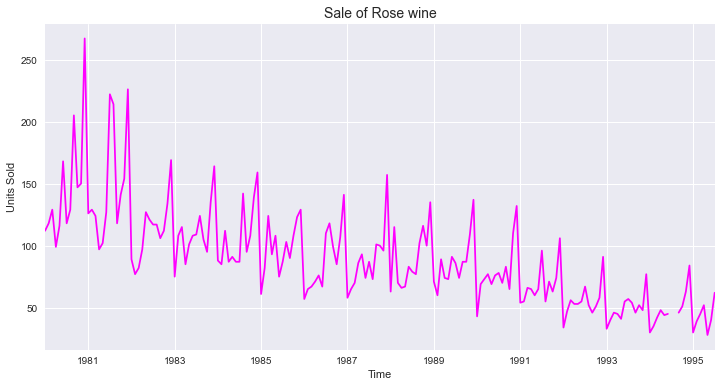

In [25]:
plt.figure(figsize = (12, 6))
df.Rose.plot(color='magenta')
plt.title('Sale of Rose wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

In [245]:
df.isnull().sum()

Rose    0
dtype: int64

In [26]:
df.converted  = df.Rose
ts = df.converted.resample('D').mean() 
df.Rose = ts.interpolate(method = 'linear')
df.Rose['1994']

YearMonth
1994-01-31    30.000000
1994-02-28    35.000000
1994-03-31    42.000000
1994-04-30    48.000000
1994-05-31    44.000000
1994-06-30    45.000000
1994-07-31    45.336957
1994-08-31    45.673913
1994-09-30    46.000000
1994-10-31    51.000000
1994-11-30    63.000000
1994-12-31    84.000000
Name: Rose, dtype: float64

In [27]:
df.describe()

Rose
count  187.000000
mean    89.914497
std     39.238259
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

In [244]:
df.isnull().sum()

Rose    0
dtype: int64

In [28]:
#Plot the Time Series to understand the behaviour of the data.

Text(0, 0.5, 'Units Sold')

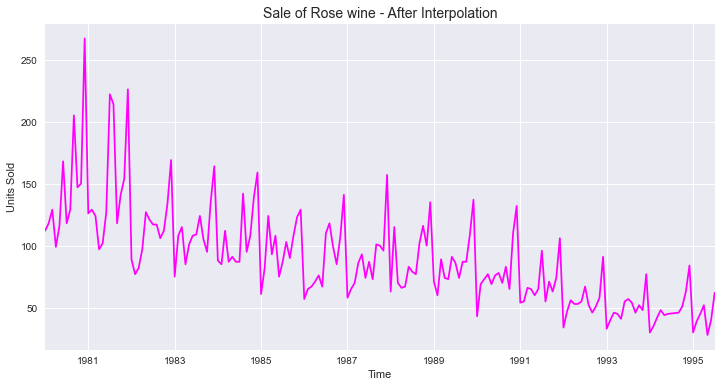

In [29]:
plt.figure(figsize = (12, 6))
df.Rose.plot(color='magenta')
plt.title('Sale of Rose wine - After Interpolation', fontsize =14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

Text(0, 0.5, 'Distribution')

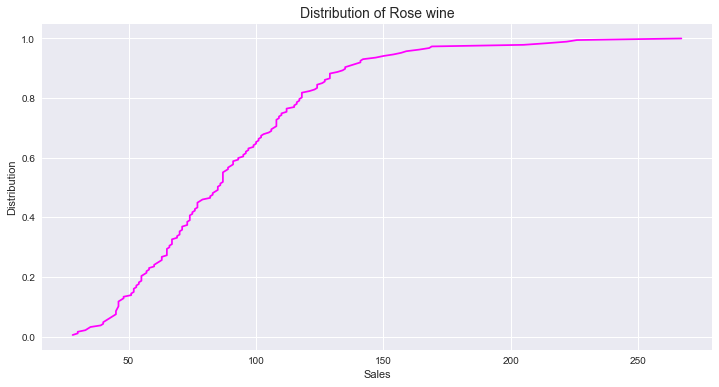

In [32]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize = (12, 6))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'magenta')
plt.title('Distribution of Rose wine', fontsize=14)
plt.xlabel('Sales')
plt.ylabel('Distribution')

Text(0.5, 1.0, 'Yearly Boxplot - Rose')

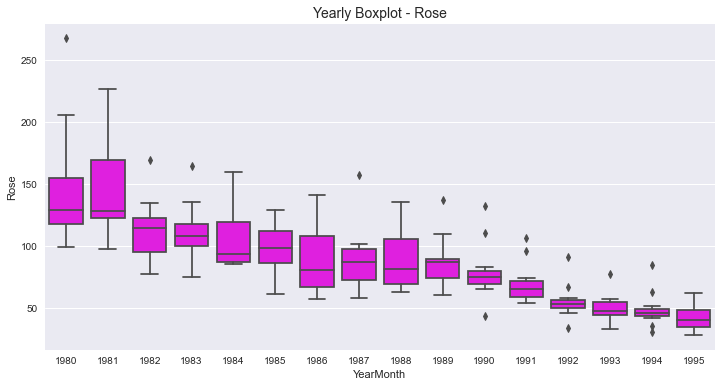

In [33]:
#Yearly Boxplot - Rose
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.year,y = df['Rose'], color='magenta')
plt.title('Yearly Boxplot - Rose', fontsize=14)

Text(0.5, 1.0, 'Monthly Boxplot - Rose')

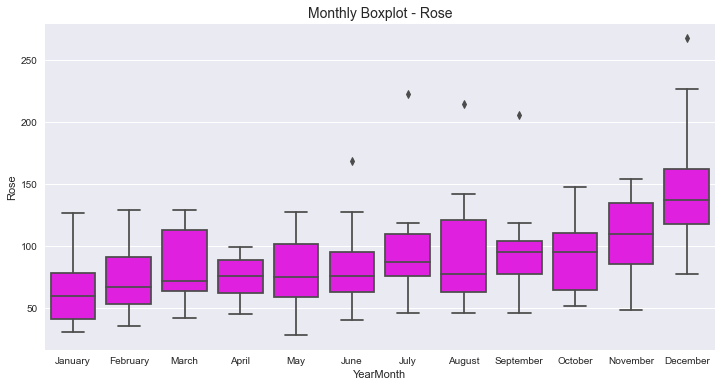

In [34]:
#Monthly Plot - Rose
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.month_name(),y = df['Rose'], color='magenta')
plt.title('Monthly Boxplot - Rose', fontsize=14)

In [ ]:
#Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

Text(0.5, 1.0, 'Rose - Monthly plot')

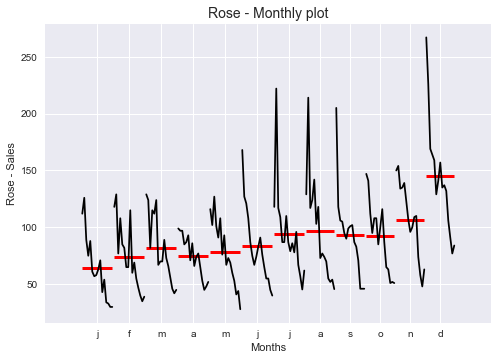

In [36]:
month_plot(df['Rose'],ylabel='Rose - Sales')
plt.xlabel('Months')
plt.title('Rose - Monthly plot', fontsize=14)

In [37]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.336957   45.673913   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

Text(0.5, 1.0, 'Rose - Monthly sales over years')

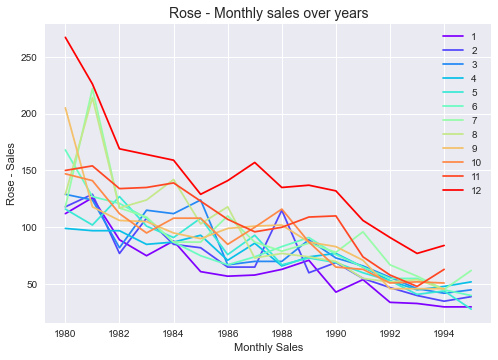

In [38]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Rose - Sales')
plt.xlabel('Monthly Sales')
plt.title('Rose - Monthly sales over years', fontsize=14)

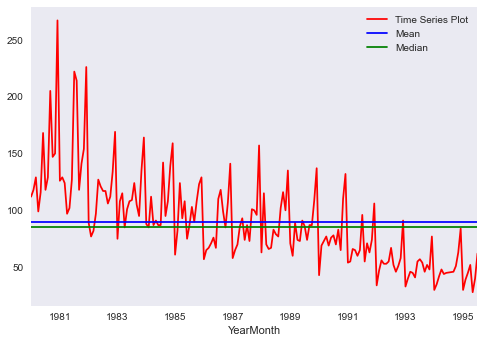

In [40]:
df.plot(color='Red')
plt.axhline(df['Rose'].mean(),color='Blue')
plt.axhline(df['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

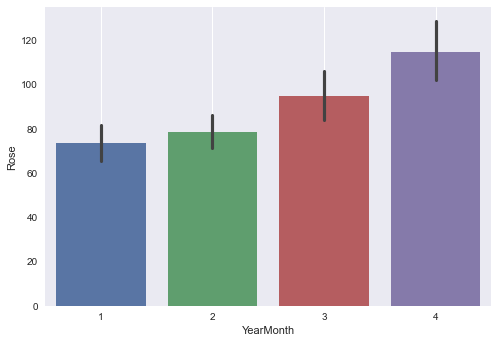

In [41]:
sns.barplot(df.index.quarter,df.Rose,data=df)
plt.grid();

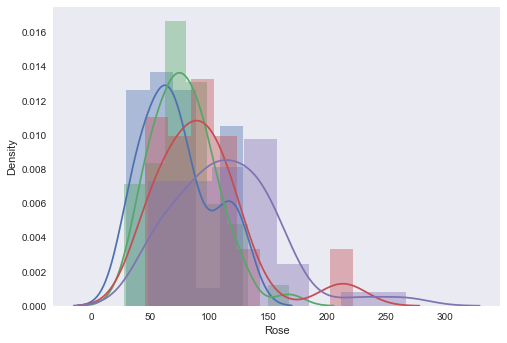

In [42]:
sns.distplot(df.loc[df.index.quarter == 1]['Rose'])
sns.distplot(df.loc[df.index.quarter == 2]['Rose'])
sns.distplot(df.loc[df.index.quarter == 3]['Rose'])
sns.distplot(df.loc[df.index.quarter == 4]['Rose'])
plt.grid();

NameError: name 'pct_change_s' is not defined

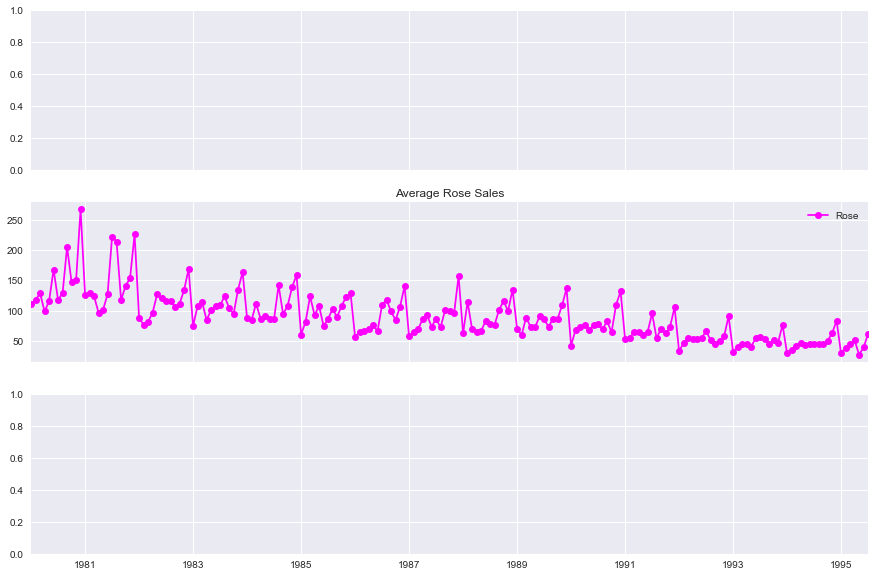

In [39]:
# group by date and get average Sparkling & Rose sales, and precent change

average_r    = df.groupby(df.index)['Rose'].mean()

pct_change_r = df.groupby(df.index)['Rose'].sum().pct_change()

fig, (axis1,axis2,axis3) = plt.subplots(3,1,sharex=True,figsize=(15,10))


ax2 = average_r.plot(legend=True,ax=axis2,marker='o',title="Average Rose Sales", color = 'magenta')
#ax2.set_xticks(range(len(average)))
#ax2.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax3 = pct_change_s.plot(legend=True,ax=axis3,marker='o',color='green',title="Sales Percent Change")
ax3 = pct_change_r.plot(legend=True,ax=axis3,marker='o',color='magenta',title="Sales Percent Change")
plt.xlabel('Time')
plt.legend(loc='best');

In [ ]:
#Decompose the Time Series and plot the different components.

In [44]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

In [ ]:
additive

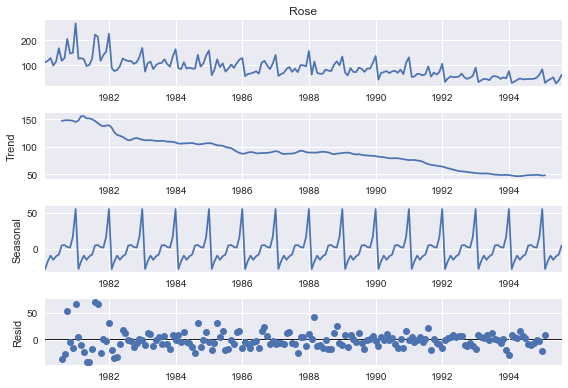

In [45]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [46]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n');

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31   -27.908708
1980-02-29   -17.435675
1980-03-31    -9.285895
1980-04-30   -15.098395
1980-05-31   -10.196609
1980-06-30    -7.678752
1980-07-31     4.897089
1980-08-31     5.500109
1980-09-30     2.774625
1980-10-31     1.871848
1980-11-30    16.846848
1980-12-31    55.713514
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980423
1980-08-31   -24.625109
1980-09-30    53.850375
1980-10-31    -2.955181
1980-11-30   -14.263514
1980-12-31    66.16148

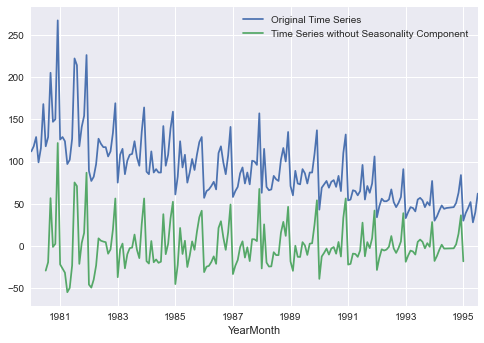

In [47]:
detrend_ts = seasonality + residual
df.Rose.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

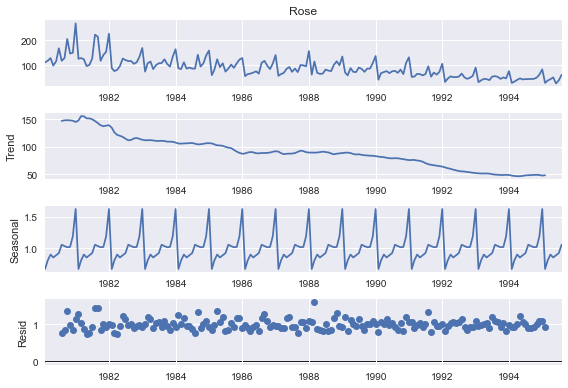

In [48]:
#Multiplicative Decomposition
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [49]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n');

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901163
1980-04-30    0.854023
1980-05-31    0.889414
1980-06-30    0.923984
1980-07-31    1.058042
1980-08-31    1.035890
1980-09-30    1.017647
1980-10-31    1.022572
1980-11-30    1.192347
1980-12-31    1.628644
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758256
1980-08-31    0.840713
1980-09-30    1.357675
1980-10-31    0.970772
1980-11-30    0.853379
1980-12-31    1.129647
Name: resid, dtype: fl

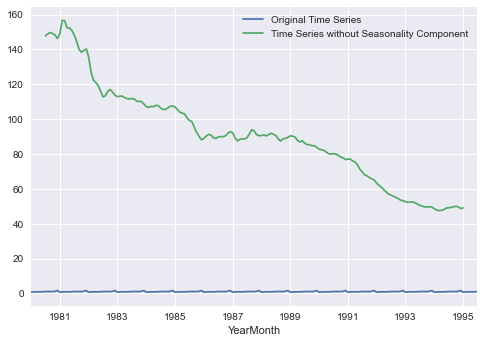

In [50]:
detrend_ts = trend + residual
#df.Rose.plot()
seasonality.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [ ]:
#Split the time series

In [52]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [53]:
from IPython.display import display

In [54]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
YearMonth       
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [55]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


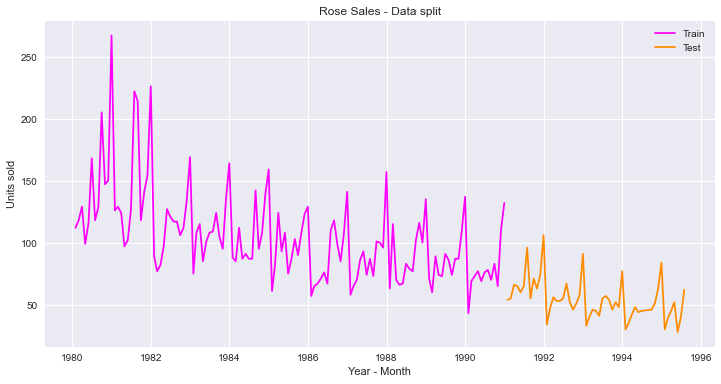

In [56]:
plt.figure(figsize = (12, 6))
plt.plot(train['Rose'], label = 'Train', color='magenta')
plt.plot(test['Rose'], label = 'Test', color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose Sales - Data split', fontsize = 12)
plt.show;

In [ ]:
LR

In [61]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [62]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [63]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [64]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

In [65]:
lr2 = LinearRegression().fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

In [66]:
LinearRegression_train['RegOnTime_rose']        = lr2.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_rose']         = lr2.predict(LinearRegression_test[['time']])

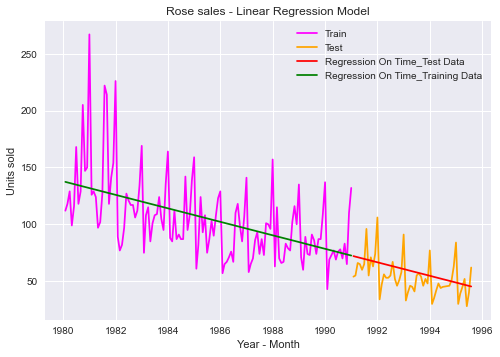

In [67]:
#plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_rose'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose sales - Linear Regression Model');

In [ ]:
modele evaluation

In [68]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [69]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model1_train = metrics.mean_squared_error(train['Rose'],LinearRegression_train['RegOnTime_rose'],squared=False)
mape_rose_model1_train = MAPE(train['Rose'],LinearRegression_train['RegOnTime_rose'])
print("For RegressionOnTime forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_train, mape_rose_model1_train))

For RegressionOnTime forecast on the Rose Training Data:  RMSE is 30.718 and MAPE is 21.22


In [70]:
## Rose testing Data - RMSE and MAPE

rmse_rose_model1_test = metrics.mean_squared_error(test['Rose'],LinearRegression_test['RegOnTime_rose'],squared=False)
mape_rose_model1_test = MAPE(test['Rose'],LinearRegression_test['RegOnTime_rose'])
print("For RegressionOnTime forecast on the Rose testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_test, mape_rose_model1_test))

For RegressionOnTime forecast on the Rose testing Data:  RMSE is 15.269 and MAPE is 22.82


In [72]:
rose_resultsDf = pd.DataFrame({'Test RMSE': [rmse_rose_model1_test],'Test MAPE': [mape_rose_model1_test]},index=['RegressionOnTime'])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82

In [ ]:
Naive

In [73]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [74]:
NaiveModel_train['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['rose_naive'].head()

YearMonth
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: rose_naive, dtype: float64

In [75]:
NaiveModel_test['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['rose_naive'].head()

YearMonth
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: rose_naive, dtype: float64

Text(0.5, 1.0, 'Rose - Naive Forecast')

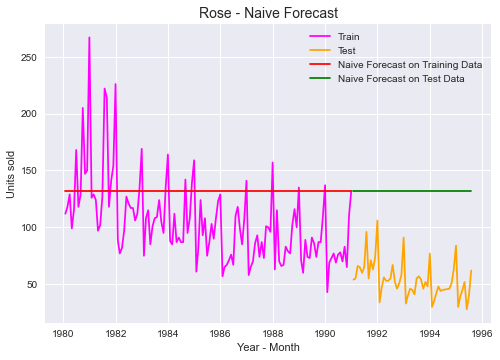

In [76]:
plt.plot(NaiveModel_train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['rose_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - Naive Forecast", fontsize = 14)

In [ ]:
modelevaluation

In [77]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['rose_naive'],squared=False)
mape_rose_model2_train = MAPE(train['Rose'],NaiveModel_train['rose_naive'])
print("For Naive forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_train, mape_rose_model2_train))

For Naive forecast on the Rose Training Data:  RMSE is 45.064 and MAPE is 36.38


In [78]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['rose_naive'],squared=False)
mape_rose_model2_test = MAPE(test['Rose'],NaiveModel_test['rose_naive'])
print("For Naive forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_test, mape_rose_model2_test))

For Naive forecast on the Rose Testing Data:  RMSE is 79.719 and MAPE is 145.10


In [79]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model2_test],'Test MAPE': [mape_rose_model2_test]},index=['NaiveModel'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10

In [ ]:
simple average

In [80]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [81]:
SimpleAverage_train['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_train['rose_mean_forecast'].head()

YearMonth
1980-01-31    104.939394
1980-02-29    104.939394
1980-03-31    104.939394
1980-04-30    104.939394
1980-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

In [82]:
SimpleAverage_test['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_test['rose_mean_forecast'].head()

YearMonth
1991-01-31    104.939394
1991-02-28    104.939394
1991-03-31    104.939394
1991-04-30    104.939394
1991-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

Text(0.5, 1.0, 'Rose - SimpleAverage Forecast')

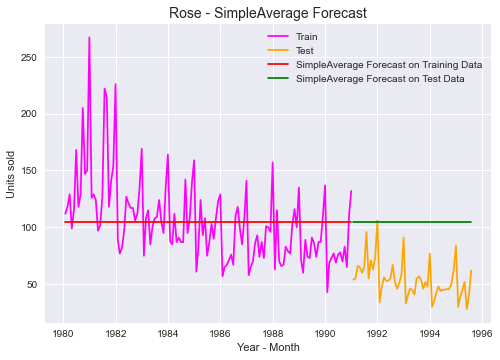

In [83]:
#plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - SimpleAverage Forecast", fontsize=14)

In [ ]:
Model Evaluation

In [84]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['rose_mean_forecast'],squared=False)
mape_rose_model3_train = MAPE(train['Rose'],SimpleAverage_train['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_train, mape_rose_model3_train))

For Simple Average forecast on the Rose Training Data:  RMSE is 36.034 and MAPE is 25.39


In [85]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['rose_mean_forecast'],squared=False)
mape_rose_model3_test = MAPE(test['Rose'],SimpleAverage_test['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_test, mape_rose_model3_test))

For Simple Average forecast on the Rose Testing Data:  RMSE is 53.460 and MAPE is 94.93


In [86]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model3_test],'Test MAPE': [mape_rose_model3_test]},index=['SimpleAverage'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93

In [ ]:
moving average

In [91]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [92]:
MovingAverage['Rose_Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Rose_Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Rose_Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Rose_Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Rose_Trailing_2  Rose_Trailing_4  Rose_Trailing_6  \
YearMonth                                                              
1980-01-31  112.0              NaN              NaN              NaN   
1980-02-29  118.0            115.0              NaN              NaN   
1980-03-31  129.0            123.5              NaN              NaN   
1980-04-30   99.0            114.0            114.5              NaN   
1980-05-31  116.0            107.5            115.5              NaN   

            Rose_Trailing_9  
YearMonth                    
1980-01-31              NaN  
1980-02-29              NaN  
1980-03-31              NaN  
1980-04-30              NaN  
1980-05-31              NaN

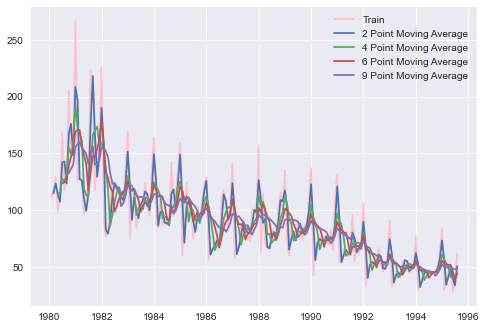

In [89]:
plt.plot(MovingAverage['Rose'], label='Train', color='pink')
plt.plot(MovingAverage['Rose_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

In [94]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Rose - Trailing Moving Average Forecast')

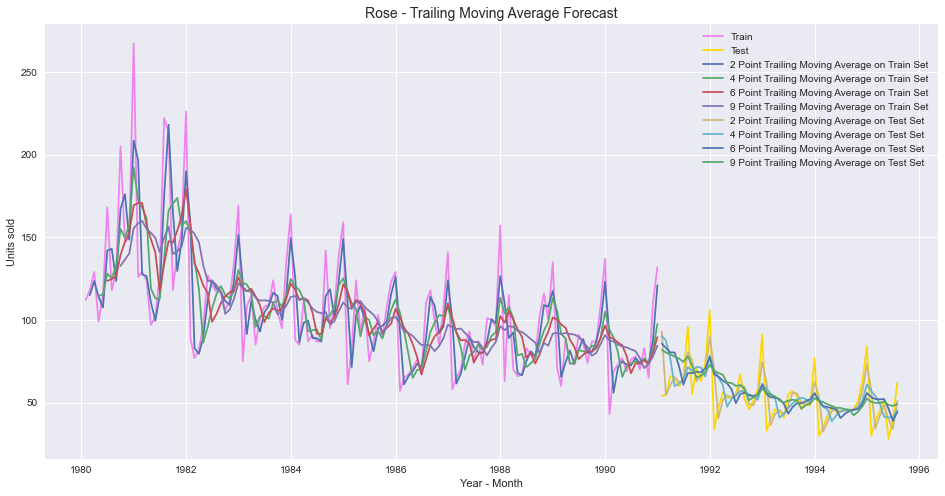

In [95]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train', color = 'violet')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Rose - Trailing Moving Average Forecast", fontsize=14)

In [ ]:
model evaluation

In [96]:
## Test Data - rmse_rose and mape_rose --> 2 point rose_Trailing MA

rmse_rose_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'],squared=False)
mape_rose_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_2, mape_rose_model4_test_2))

## Test Data - rmse_rose and mape_rose --> 4 point rose_Trailing MA

rmse_rose_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'],squared=False)
mape_rose_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_4, mape_rose_model4_test_4))

## Test Data - rmse_rose and mape_rose --> 6 point rose_Trailing MA

rmse_rose_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'],squared=False)
mape_rose_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_6, mape_rose_model4_test_6))

## Test Data - rmse_rose and mape_rose --> 9 point rose_Trailing MA

rmse_rose_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'],squared=False)
mape_rose_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_9, mape_rose_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is 11.529 mape_rose is 13.54
For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.451 mape_rose is 19.49
For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.566 mape_rose is 20.82
For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.728 mape_rose is 21.01


In [97]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_rose_model4_test_2,rmse_rose_model4_test_4
                                          ,rmse_rose_model4_test_6,rmse_rose_model4_test_9]
                            ,'Test MAPE': [mape_rose_model4_test_2,mape_rose_model4_test_4,
                                           mape_rose_model4_test_6,mape_rose_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_4])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93
2 point TMA       11.529278      13.54
4 point TMA       14.451364      19.49
6 point TMA       14.566269      20.82
9 point TMA       14.727594      21.01

In [ ]:
simple expo

In [99]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [100]:
SES_train = train.copy()
SES_test = test.copy()

In [101]:
SES_train['Rose'].head()

YearMonth
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
Name: Rose, dtype: float64

In [102]:
model_rose = SimpleExpSmoothing(SES_train['Rose'])
#model_SES_autofit2 = model_rose.fit(optimized=True,use_brute=True)

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


Test: For alpha = 0.10,  RMSE is 36.8278 MAPE is 63.94
For smoothing level = 0.10,  Initial level 112.00


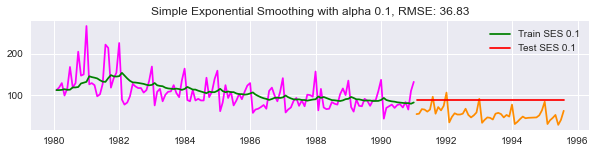

Test: For alpha = 0.20,  RMSE is 41.3617 MAPE is 72.21
For smoothing level = 0.20,  Initial level 112.00


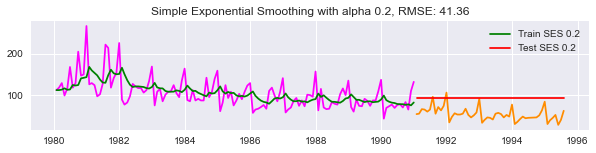

Test: For alpha = 0.30,  RMSE is 47.5046 MAPE is 83.71
For smoothing level = 0.30,  Initial level 112.00


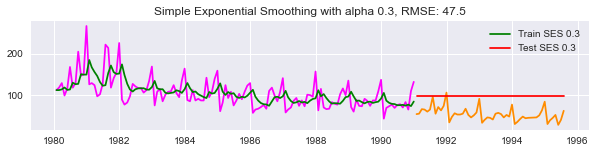

Test: For alpha = 0.50,  RMSE is 59.6416 MAPE is 106.81
For smoothing level = 0.50,  Initial level 112.00


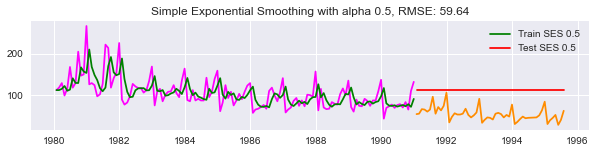

Test: For alpha = 0.99,  RMSE is 79.4985 MAPE is 144.69
For smoothing level = 0.99,  Initial level 112.00


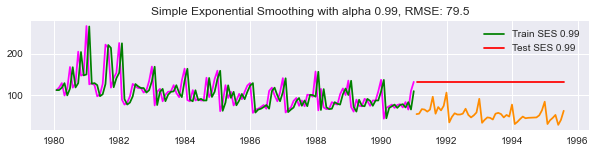

In [103]:
alpha_list = [0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model_rose.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Rose']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Rose'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Rose'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Rose'], color = 'magenta')
    plt.plot(test['Rose'], color = 'darkorange')
    plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
    plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    plt.legend(loc='best') 
    plt.show()

In [104]:
model_SES_autofit2 = model_rose.fit(optimized=True,use_brute=True)
model_SES_autofit2.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [105]:
SES_train['predict_rose'] = model_SES_autofit2.fittedvalues
SES_train.head()

Rose  predict_rose
YearMonth                      
1980-01-31  112.0    134.387202
1980-02-29  118.0    132.176481
1980-03-31  129.0    130.776564
1980-04-30   99.0    130.601129
1980-05-31  116.0    127.480539

In [106]:
SES_test['predict_rose'] = model_SES_autofit2.forecast(steps=len(SES_test))
SES_test.head()

Rose  predict_rose
YearMonth                     
1991-01-31  54.0     87.104983
1991-02-28  55.0     87.104983
1991-03-31  66.0     87.104983
1991-04-30  65.0     87.104983
1991-05-31  60.0     87.104983

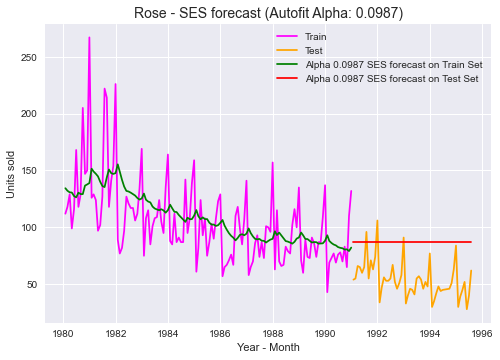

In [107]:
#plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train', color = 'magenta')
plt.plot(SES_test['Rose'], label='Test', color = 'orange')

plt.plot(SES_train['predict_rose'],color = 'green', label='Alpha 0.0987 SES forecast on Train Set')
plt.plot(SES_test['predict_rose'],color = 'red', label='Alpha 0.0987 SES forecast on Test Set')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose - SES forecast (Autofit Alpha: 0.0987)', fontsize = 14);

In [108]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model5_train = metrics.mean_squared_error(train['Rose'],SES_train['predict_rose'],squared=False)
mape_rose_model5_train = MAPE(train['Rose'],SES_train['predict_rose'])
print("For SES forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_train, mape_rose_model5_train))

For SES forecast on the Rose Training Data:  RMSE is 31.501 and MAPE is 22.73


In [109]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model5_test = metrics.mean_squared_error(test['Rose'],SES_test['predict_rose'],squared=False)
mape_rose_model5_test = MAPE(test['Rose'],SES_test['predict_rose'])
print("For SES forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_test, mape_rose_model5_test))

For SES forecast on the Rose Testing Data:  RMSE is 36.796 and MAPE is 63.88


In [110]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_rose_model5_test],'Test MAPE': [mape_rose_model5_test]},index=['SES Alpha 0.01'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_5])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93
2 point TMA       11.529278      13.54
4 point TMA       14.451364      19.49
6 point TMA       14.566269      20.82
9 point TMA       14.727594      21.01
SES Alpha 0.01    36.796004      63.88

In [111]:
model_rose = SimpleExpSmoothing(SES_train['Rose'])
#model_SES_autofit2 = model_rose.fit(optimized=True,use_brute=True)

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


Test: For alpha = 0.10,  RMSE is 36.8278 MAPE is 63.94
For smoothing level = 0.10,  Initial level 112.00


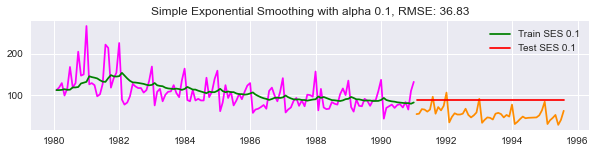

Test: For alpha = 0.20,  RMSE is 41.3617 MAPE is 72.21
For smoothing level = 0.20,  Initial level 112.00


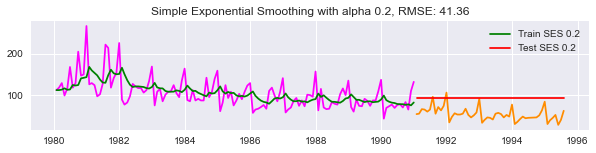

Test: For alpha = 0.30,  RMSE is 47.5046 MAPE is 83.71
For smoothing level = 0.30,  Initial level 112.00


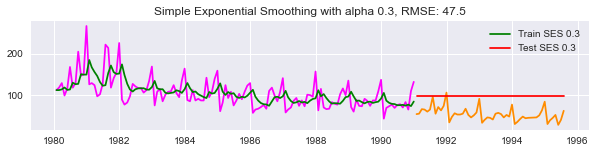

Test: For alpha = 0.50,  RMSE is 59.6416 MAPE is 106.81
For smoothing level = 0.50,  Initial level 112.00


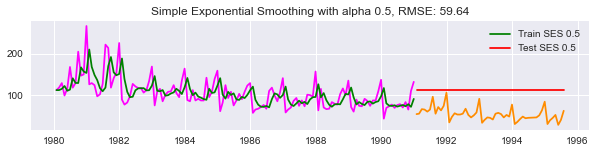

Test: For alpha = 0.99,  RMSE is 79.4985 MAPE is 144.69
For smoothing level = 0.99,  Initial level 112.00


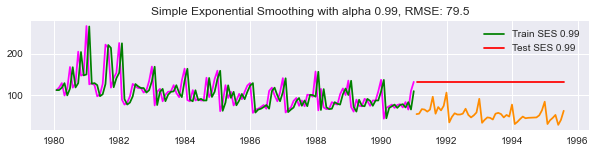

In [112]:
alpha_list = [0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model_rose.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Rose']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Rose'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Rose'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Rose'], color = 'magenta')
    plt.plot(test['Rose'], color = 'darkorange')
    plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
    plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    plt.legend(loc='best') 
    plt.show()

In [113]:
model_SES_autofit2 = model_rose.fit(optimized=True,use_brute=True)
model_SES_autofit2.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [114]:
SES_train['predict_rose'] = model_SES_autofit2.fittedvalues
SES_train.head()

Rose  predict_rose
YearMonth                      
1980-01-31  112.0    134.387202
1980-02-29  118.0    132.176481
1980-03-31  129.0    130.776564
1980-04-30   99.0    130.601129
1980-05-31  116.0    127.480539

In [115]:
SES_test['predict_rose'] = model_SES_autofit2.forecast(steps=len(SES_test))
SES_test.head()

Rose  predict_rose
YearMonth                     
1991-01-31  54.0     87.104983
1991-02-28  55.0     87.104983
1991-03-31  66.0     87.104983
1991-04-30  65.0     87.104983
1991-05-31  60.0     87.104983

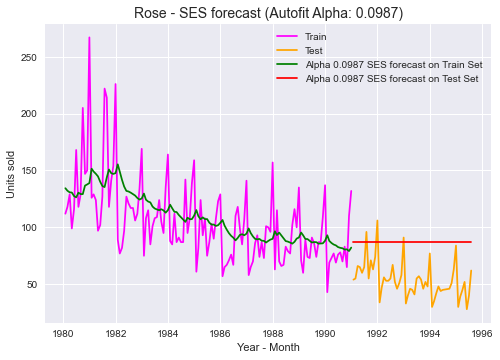

In [116]:
#plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train', color = 'magenta')
plt.plot(SES_test['Rose'], label='Test', color = 'orange')

plt.plot(SES_train['predict_rose'],color = 'green', label='Alpha 0.0987 SES forecast on Train Set')
plt.plot(SES_test['predict_rose'],color = 'red', label='Alpha 0.0987 SES forecast on Test Set')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose - SES forecast (Autofit Alpha: 0.0987)', fontsize = 14);

In [117]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model5_train = metrics.mean_squared_error(train['Rose'],SES_train['predict_rose'],squared=False)
mape_rose_model5_train = MAPE(train['Rose'],SES_train['predict_rose'])
print("For SES forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_train, mape_rose_model5_train))

For SES forecast on the Rose Training Data:  RMSE is 31.501 and MAPE is 22.73


In [118]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model5_test = metrics.mean_squared_error(test['Rose'],SES_test['predict_rose'],squared=False)
mape_rose_model5_test = MAPE(test['Rose'],SES_test['predict_rose'])
print("For SES forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_test, mape_rose_model5_test))

For SES forecast on the Rose Testing Data:  RMSE is 36.796 and MAPE is 63.88


In [119]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_rose_model5_test],'Test MAPE': [mape_rose_model5_test]},index=['SES Alpha 0.01'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_5])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93
2 point TMA       11.529278      13.54
4 point TMA       14.451364      19.49
6 point TMA       14.566269      20.82
9 point TMA       14.727594      21.01
SES Alpha 0.01    36.796004      63.88
SES Alpha 0.01    36.796004      63.88

In [ ]:
Double Exponential Smoothing (Holt's Model)

In [122]:
DES_train = train.copy()
DES_test = test.copy()

In [123]:
model_DES_rose = Holt(DES_train['Rose'])

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [124]:
resultsDf_6_rose = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_rose_alpha_i_j = model_DES_rose.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_rose',i,j] = model_DES_rose_alpha_i_j.fittedvalues
        DES_test['predict_rose',i,j] = model_DES_rose_alpha_i_j.forecast(len(test['Rose']))
        
        rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',i,j],squared=False)
        mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',i,j])
        
        rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',i,j],squared=False)
        mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',i,j])
        
        resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':i,'Beta':j,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [125]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1   32.026565       22.78  37.056911      64.02
1     0.1   0.2   32.685228       23.63  48.806921      83.29
10    0.2   0.1   32.796403       23.06  65.731352     113.20
2     0.1   0.3   32.925494       24.23  78.209401     131.33
20    0.3   0.1   33.528397       23.47  98.653063     170.12

In [126]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1   32.026565       22.78  37.056911      64.02
1     0.1   0.2   32.685228       23.63  48.806921      83.29
10    0.2   0.1   32.796403       23.06  65.731352     113.20
2     0.1   0.3   32.925494       24.23  78.209401     131.33
3     0.1   0.4   33.179749       24.75  99.554566     165.49

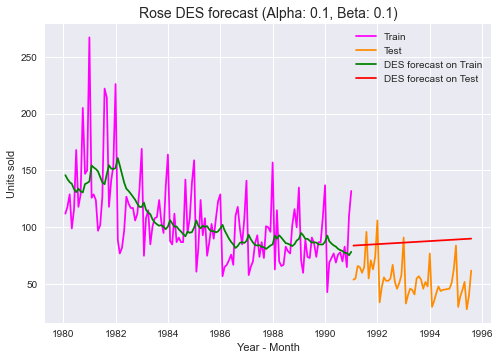

In [127]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train', color = 'magenta')
plt.plot(DES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_rose', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_rose', 0.1, 0.1], color = 'red', label='DES forecast on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Alpha: 0.1, Beta: 0.1)', fontsize=14);
plt.legend(loc='best');

In [128]:
model_DES_rose_autofit = model_DES_rose.fit(optimized=True,use_brute=True)

In [129]:
model_DES_rose_autofit.params

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [130]:
alpha = model_DES_rose_autofit.params['smoothing_level']
beta = model_DES_rose_autofit.params['smoothing_trend']
alpha_6_2 = alpha
beta_6_2 = beta

In [131]:
DES_train['predict_rose',alpha,beta] = model_DES_rose_autofit.fittedvalues

In [132]:
DES_test['predict_rose',alpha,beta] = model_DES_rose_autofit.forecast(len(test['Rose']))

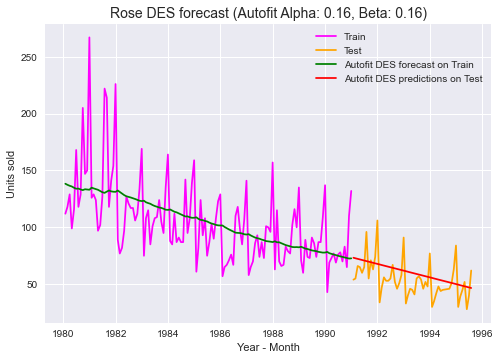

In [133]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train', color = 'magenta')
plt.plot(DES_test['Rose'], label='Test', color = 'orange')

plt.plot(DES_train['predict_rose',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_rose',alpha,beta], color = 'red', label='Autofit DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Autofit Alpha: 0.16, Beta: 0.16)', fontsize=14)

plt.legend(loc='best')

In [134]:
rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',alpha,beta],squared=False)
mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',alpha,beta])
        
rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',alpha,beta],squared=False)
mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',alpha,beta])
        
resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [135]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

Alpha      Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
100  0.01755  0.000032   30.890794       21.61  15.706968      24.12
0    0.10000  0.100000   32.026565       22.78  37.056911      64.02
1    0.10000  0.200000   32.685228       23.63  48.806921      83.29
10   0.20000  0.100000   32.796403       23.06  65.731352     113.20
2    0.10000  0.300000   32.925494       24.23  78.209401     131.33

In [136]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

Alpha      Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
100  0.01755  0.000032   30.890794       21.61  15.706968      24.12
0    0.10000  0.100000   32.026565       22.78  37.056911      64.02
1    0.10000  0.200000   32.685228       23.63  48.806921      83.29
10   0.20000  0.100000   32.796403       23.06  65.731352     113.20
2    0.10000  0.300000   32.925494       24.23  78.209401     131.33

In [ ]:
me

In [137]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE':[resultsDf_6_rose['Test RMSE'][100],resultsDf_6_rose['Test RMSE'][0]],
                              'Test MAPE':[resultsDf_6_rose['Test MAPE'][100],resultsDf_6_rose['Test MAPE'][0]]}
                           ,index=['DES Alpha 0.16, Beta 0.16','DES Alpha 0.10, Beta 0.10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_6_1])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime           15.268885      22.82
NaiveModel                 79.718559     145.10
SimpleAverage              53.460350      94.93
2 point TMA                11.529278      13.54
4 point TMA                14.451364      19.49
6 point TMA                14.566269      20.82
9 point TMA                14.727594      21.01
SES Alpha 0.01             36.796004      63.88
SES Alpha 0.01             36.796004      63.88
DES Alpha 0.16, Beta 0.16  15.706968      24.12
DES Alpha 0.10, Beta 0.10  37.056911      64.02

In [ ]:
triple

In [138]:
TES_train = train.copy()
TES_test = test.copy()

In [139]:
model_TES_2 = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [140]:
resultsDf_7_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})

In [141]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_2.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_rose',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_rose',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Rose']))
        
            rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',i,j,k],squared=False)
            mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',i,j,k])
        
            rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',i,j,k],squared=False)
            mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',i,j,k])
        
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

In [142]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171621      13.19
11     0.1   0.2    0.2   20.140683       14.66   9.493832      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682585      13.71
142    0.2   0.5    0.3   23.300524       17.35   9.885717      14.21
12     0.1   0.2    0.3   20.725703       14.88   9.896169      14.16

In [143]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171621      13.19
243    0.3   0.5    0.4   25.873405       17.54  10.375280      13.26
223    0.3   0.3    0.4   24.209084       16.78  10.169702      13.67
11     0.1   0.2    0.2   20.140683       14.66   9.493832      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682585      13.71

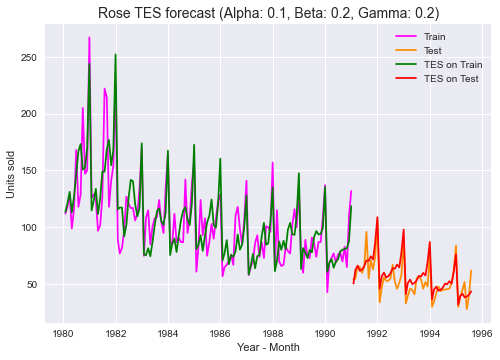

In [144]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

#plt.plot(TES_train['predict_rose', 0.2, 0.6, 0.2], color = 'green', label='Alpha=0.2,Beta=0.6,Gamma=0.2,TES on Train')
#plt.plot(TES_test['predict_rose', 0.2, 0.6, 0.2], color='red', label='Alpha=0.2,Beta=0.6,Gamma=0.2,TES on Test')

plt.plot(TES_train['predict_rose', 0.1, 0.2, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose', 0.1, 0.2, 0.2], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Alpha: 0.1, Beta: 0.2, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best')

In [145]:
model_TES_autofit = model_TES_2.fit(optimized=True,use_brute=True)

In [146]:
model_TES_autofit.params

{'smoothing_level': 0.06569374607191865,
 'smoothing_trend': 0.05192938504457338,
 'smoothing_seasonal': 3.879136202038614e-06,
 'damping_trend': nan,
 'initial_level': 54.10985491750761,
 'initial_trend': -0.33471965714896845,
 'initial_seasons': array([2.08282313, 2.36326666, 2.58210206, 2.25702695, 2.53757493,
        2.76639991, 3.04101803, 3.23434567, 3.06747277, 3.00164124,
        3.49893806, 4.82552476]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [147]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_2 = alpha
beta_7_2 = beta
gamma_7_2 = gamma

In [148]:
TES_train['predict_rose',alpha,beta,gamma] = model_TES_autofit.fittedvalues

TES_test['predict_rose',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Rose']))

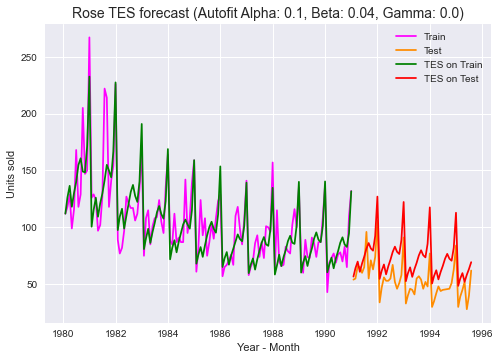

In [149]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_rose',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Autofit Alpha: 0.1, Beta: 0.04, Gamma: 0.0)', fontsize=14)

plt.legend(loc='best')

In [150]:
rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma])
        
rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma])
        
resultsDf_7_2 = resultsDf_7_2.append({'Alpha':alpha,'Beta':beta,'Gamma':gamma,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)

In [151]:
resultsDf_7_2.tail()

Alpha      Beta     Gamma    Train RMSE  Train MAPE     Test RMSE  \
996   1.000000  1.000000  0.700000  30724.126331     4617.55  23029.955358   
997   1.000000  1.000000  0.800000   1218.755446      493.75   9626.710890   
998   1.000000  1.000000  0.900000  14150.253251     2303.41   9691.905408   
999   1.000000  1.000000  1.000000   1768.254189      614.79   8138.618610   
1000  0.065694  0.051929  0.000004     18.405018       12.55     21.019341   

      Test MAPE  
996    11836.01  
997     8580.97  
998     7916.16  
999     6811.03  
1000      35.16

In [152]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171621      13.19
11     0.1   0.2    0.2   20.140683       14.66   9.493832      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682585      13.71
142    0.2   0.5    0.3   23.300524       17.35   9.885717      14.21
12     0.1   0.2    0.3   20.725703       14.88   9.896169      14.16

In [153]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171621      13.19
243    0.3   0.5    0.4   25.873405       17.54  10.375280      13.26
223    0.3   0.3    0.4   24.209084       16.78  10.169702      13.67
11     0.1   0.2    0.2   20.140683       14.66   9.493832      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682585      13.71

In [ ]:
me

In [154]:
resultsDf_7_ro = pd.DataFrame({'Test RMSE': [resultsDf_7_2['Test RMSE'][11],resultsDf_7_2['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_2['Test MAPE'][11],resultsDf_7_2['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.1, Beta 0.2, Gamma 0.2','TES Alpha 0.11, Beta 0.05, Gamma 0.00'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_7_ro])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16

In [155]:
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
RegressionOnTime                       15.268885      22.82
DES Alpha 0.16, Beta 0.16              15.706968      24.12
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16
SES Alpha 0.01                         36.796004      63.88
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.10, Beta 0.10              37.056911      64.02
SimpleAverage                          53.460350      94.93
NaiveModel                             79.718559     145.10

Text(0, 0.5, 'Sales of Rose')

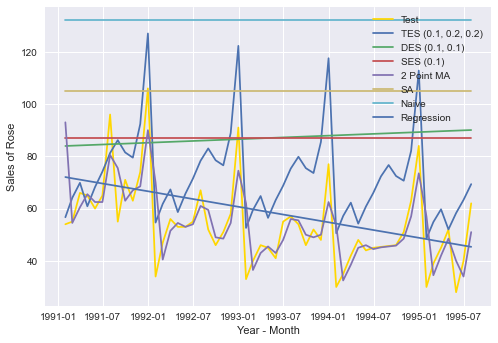

In [156]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'gold')
#TES
#plt.plot(TES_train['predict_rose',alpha_7_2,beta_7_2,gamma_7_2], label='TES on Train')
#DES
#plt.plot(DES_train['predict_rose',0.1,0.1], label='DES on Train')
#SES
#plt.plot(SES_train['predict_rose'], label='SES on Train')
#MA
#plt.plot(trailing_MovingAverage_train['Rose_Trailing_2'], label='2 Point MA on Train')
#SA
#plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SA on Train')
#Naive
#plt.plot(NaiveModel_train['rose_naive'], label='Naive on Train')
#Regression
#plt.plot(LinearRegression_train['RegOnTime_rose'], label='Regression on Train')

#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES (0.1, 0.2, 0.2)')
#DES
plt.plot(DES_test['predict_rose',0.1,0.1],  label='DES (0.1, 0.1)')
#SES
plt.plot(SES_test['predict_rose'],  label='SES (0.1)')
#MA
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['rose_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Sales of Rose')

In [157]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

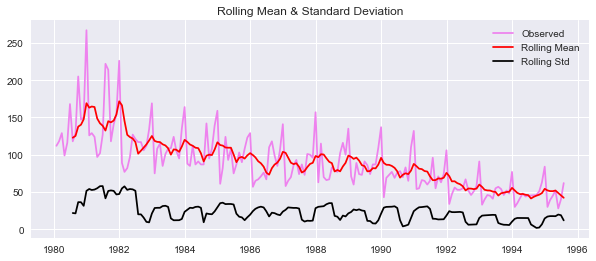

Results of Dickey-Fuller Test:
Test Statistic                  -1.876719
p-value                          0.343091
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [158]:
plt.figure(figsize=(10,4))
test_stationarity(df['Rose'], 'violet')

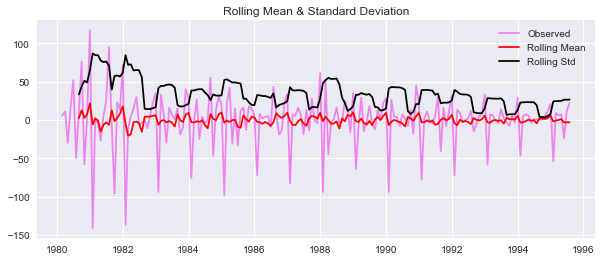

Results of Dickey-Fuller Test:
Test Statistic                -8.044395e+00
p-value                        1.810868e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [159]:
plt.figure(figsize=(10,4))
test_stationarity(df['Rose'].diff().dropna(), 'violet')

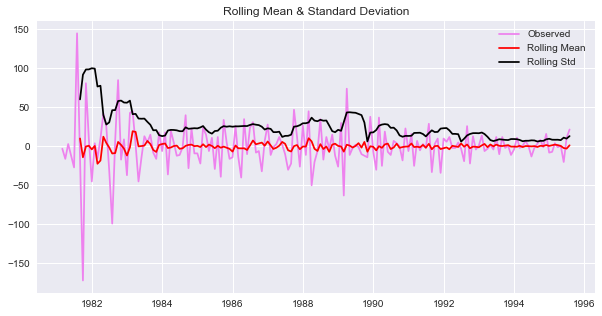

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [160]:
plt.figure(figsize=(10,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna(), 'violet')

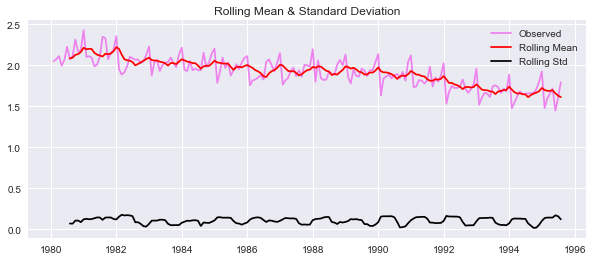

Results of Dickey-Fuller Test:
Test Statistic                  -0.422555
p-value                          0.906264
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [161]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Rose']), 'violet')

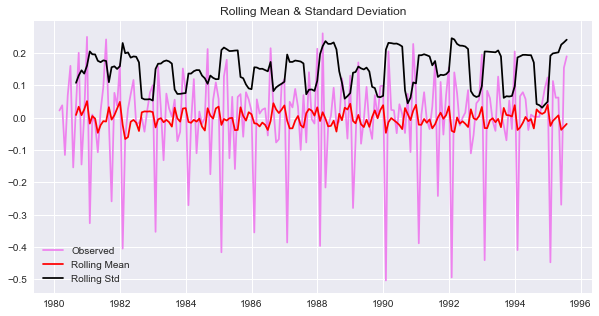

Results of Dickey-Fuller Test:
Test Statistic                -8.669696e+00
p-value                        4.581847e-14
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [162]:
plt.figure(figsize=(10,5))
test_stationarity(np.log10(df['Rose']).diff().dropna(), 'violet')

In [ ]:
Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF 
on the training data and evaluate this model on the test data using RMSE.
Build a table with all the models built along with their corresponding 
parameters and the respective RMSE values on the test data.


In [163]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

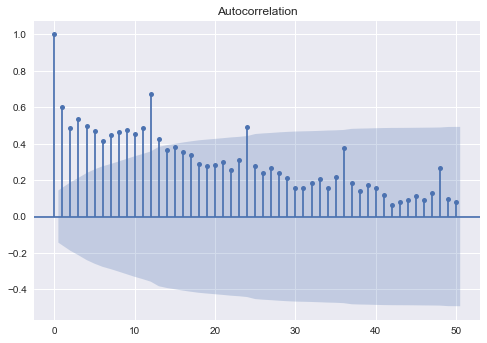

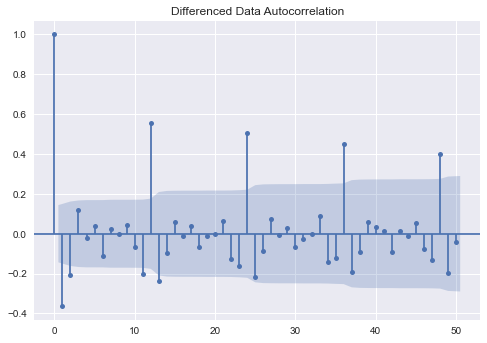

In [164]:
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

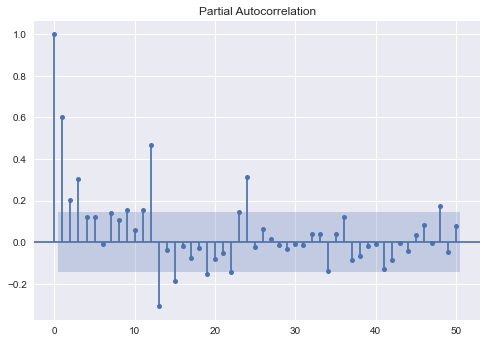

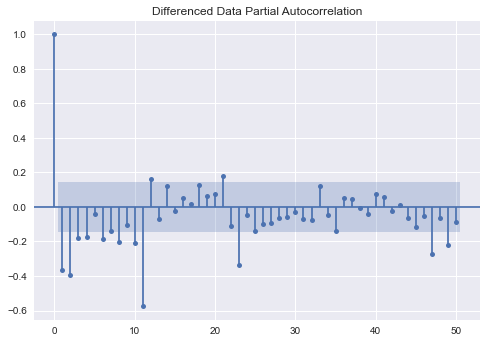

In [165]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [ ]:
aic 

In [166]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

In [167]:
import itertools
p = q = range(0,4)
d = range(1,2)
D = range(1,2)


pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [168]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [169]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438279514
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301621102
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014776037
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3365.688534295341
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658807
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601602
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.733218265448
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:3315.148147669504
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374416
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.339072914358
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244222538


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:2312.5874023880265
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:752.3958122739762
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:748.3165246489946
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:748.9721713372096


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:3477.259152077564
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.766313356333
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.0730606717374
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:790.9032809266386


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 1, 3, 12)7 - AIC:1902.8270878224168
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:944.245665553056
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:929.3362488520069
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:792.7161670279381


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 1, 3, 12)7 - AIC:3223.091776969927
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:810.3194350158651
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:804.1555763179309
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:782.1538715355576


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 1, 3, 12)7 - AIC:2285.524805391755
SARIMA(0, 1, 1)x(3, 1, 0, 12)7 - AIC:708.0834235709017
SARIMA(0, 1, 1)x(3, 1, 1, 12)7 - AIC:700.0095708522824
SARIMA(0, 1, 1)x(3, 1, 2, 12)7 - AIC:701.4835578467033


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 1, 3, 12)7 - AIC:2738.2827850264234
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:1098.659802429431
SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:904.500348847244
SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:784.014095570375


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 1, 3, 12)7 - AIC:1188.5048008256272
SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:941.525692336279
SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:915.2731134090568
SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:785.823714429321
SARIMA(0, 1, 2)x(1, 1, 3, 12)7 - AIC:3232.3321417845236
SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:811.5489438178313
SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:805.1158488730562
SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:774.9691193789743


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 1, 3, 12)7 - AIC:16.0
SARIMA(0, 1, 2)x(3, 1, 0, 12)7 - AIC:709.6122120727667
SARIMA(0, 1, 2)x(3, 1, 1, 12)7 - AIC:701.700988952949
SARIMA(0, 1, 2)x(3, 1, 2, 12)7 - AIC:703.0330965435886


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 1, 3, 12)7 - AIC:84.25541896016976
SARIMA(0, 1, 3)x(0, 1, 0, 12)7 - AIC:1088.3764710136722
SARIMA(0, 1, 3)x(0, 1, 1, 12)7 - AIC:897.1317873892909
SARIMA(0, 1, 3)x(0, 1, 2, 12)7 - AIC:778.4427567857279


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 1, 3, 12)7 - AIC:4482.635938402409
SARIMA(0, 1, 3)x(1, 1, 0, 12)7 - AIC:943.5043088714308
SARIMA(0, 1, 3)x(1, 1, 1, 12)7 - AIC:904.9319970114617
SARIMA(0, 1, 3)x(1, 1, 2, 12)7 - AIC:780.2386079743382


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 1, 3, 12)7 - AIC:3230.740359977694
SARIMA(0, 1, 3)x(2, 1, 0, 12)7 - AIC:813.4051893208962
SARIMA(0, 1, 3)x(2, 1, 1, 12)7 - AIC:806.466772513308
SARIMA(0, 1, 3)x(2, 1, 2, 12)7 - AIC:767.2243746036712


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 1, 3, 12)7 - AIC:94.17230294086687
SARIMA(0, 1, 3)x(3, 1, 0, 12)7 - AIC:711.7218300944096
SARIMA(0, 1, 3)x(3, 1, 1, 12)7 - AIC:703.6693127291838
SARIMA(0, 1, 3)x(3, 1, 2, 12)7 - AIC:705.3781159948662


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 1, 3, 12)7 - AIC:506.6798819094579
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:1164.5103013842067
SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:953.8813887547028
SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:828.8398832821233


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 1, 3, 12)7 - AIC:3283.368556790812
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:962.9698535735688
SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:964.8516934823588
SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:830.3075804966659


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 1, 3, 12)7 - AIC:3448.045205214114
SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:826.9995808091124
SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:823.8261102783811
SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:825.0437253082293


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 1, 3, 12)7 - AIC:2540.6148969998094
SARIMA(1, 1, 0)x(3, 1, 0, 12)7 - AIC:727.3669084126892
SARIMA(1, 1, 0)x(3, 1, 1, 12)7 - AIC:728.9034690439188
SARIMA(1, 1, 0)x(3, 1, 2, 12)7 - AIC:721.9926158643424
SARIMA(1, 1, 0)x(3, 1, 3, 12)7 - AIC:3162.533394797107
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:1110.620946440031
SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:914.0453844988148
SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:792.3411370856699
SARIMA(1, 1, 1)x(0, 1, 3, 12)7 - AIC:5859.841497382074
SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:933.29742168237
SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:927.2920638200434
SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:794.1929706683504
SARIMA(1, 1, 1)x(1, 1, 3, 12)7 - AIC:3225.443188470518
SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:799.9474258320836
SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:791.9065436336722
SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:783.8990945735527
SARIMA(1, 1, 1)x(2, 1, 3, 12)7 - AIC:16.0
SARIMA(1, 1, 1)x(3, 1, 0, 12)7 - AIC:702.166981013252
SARIMA(1, 1, 1)x(3, 1, 1,

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 1, 3, 12)7 - AIC:2149.5783201716063
SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:1096.3571024842065
SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:906.4966907624965
SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:785.9832739059808
SARIMA(1, 1, 2)x(0, 1, 3, 12)7 - AIC:14.0
SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:934.8870392438203
SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:917.2527818406938
SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:787.7843970225006


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 3, 12)7 - AIC:3221.38663426771
SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:801.9382052143695
SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:791.9171139287156
SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:776.9401084782093
SARIMA(1, 1, 2)x(2, 1, 3, 12)7 - AIC:18.0
SARIMA(1, 1, 2)x(3, 1, 0, 12)7 - AIC:703.8075522584793
SARIMA(1, 1, 2)x(3, 1, 1, 12)7 - AIC:696.108898623262
SARIMA(1, 1, 2)x(3, 1, 2, 12)7 - AIC:697.2354819000986


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 3, 12)7 - AIC:237.90235397423874
SARIMA(1, 1, 3)x(0, 1, 0, 12)7 - AIC:1088.0914860032076
SARIMA(1, 1, 3)x(0, 1, 1, 12)7 - AIC:895.9867971313549
SARIMA(1, 1, 3)x(0, 1, 2, 12)7 - AIC:780.3059561893533
SARIMA(1, 1, 3)x(0, 1, 3, 12)7 - AIC:797.2303077018221
SARIMA(1, 1, 3)x(1, 1, 0, 12)7 - AIC:936.6664092076135
SARIMA(1, 1, 3)x(1, 1, 1, 12)7 - AIC:906.7653660424539
SARIMA(1, 1, 3)x(1, 1, 2, 12)7 - AIC:782.1027704585122


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 1, 3, 12)7 - AIC:3097.731740269224
SARIMA(1, 1, 3)x(2, 1, 0, 12)7 - AIC:803.6616207210344
SARIMA(1, 1, 3)x(2, 1, 1, 12)7 - AIC:793.9162133450986
SARIMA(1, 1, 3)x(2, 1, 2, 12)7 - AIC:767.4753545431696


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 1, 3, 12)7 - AIC:20.0
SARIMA(1, 1, 3)x(3, 1, 0, 12)7 - AIC:702.934308763227
SARIMA(1, 1, 3)x(3, 1, 1, 12)7 - AIC:696.4191659768577
SARIMA(1, 1, 3)x(3, 1, 2, 12)7 - AIC:698.0866270714961


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 1, 3, 12)7 - AIC:3917.350454349344
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:1133.246770439664
SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:949.5332566880157
SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:827.1933387102657


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 1, 3, 12)7 - AIC:3269.617760195966
SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:950.2637728229208
SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:952.2623518887143
SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:828.7198700938075


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 1, 3, 12)7 - AIC:3417.0245224439154
SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:814.296926179481
SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:808.5100914942385
SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:810.0074804177931
SARIMA(2, 1, 0)x(2, 1, 3, 12)7 - AIC:3237.883106513995
SARIMA(2, 1, 0)x(3, 1, 0, 12)7 - AIC:714.7788976438151
SARIMA(2, 1, 0)x(3, 1, 1, 12)7 - AIC:705.0868021727468
SARIMA(2, 1, 0)x(3, 1, 2, 12)7 - AIC:707.1846918786325
SARIMA(2, 1, 0)x(3, 1, 3, 12)7 - AIC:2940.3764301771953
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:1107.116636235976
SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:915.1236479103466
SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:794.279962627723
SARIMA(2, 1, 1)x(0, 1, 3, 12)7 - AIC:14.0
SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:926.31970362681
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:928.3197020908628
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:796.1300001392472


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:3614.5968020273062
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:792.8940753934108
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:784.8928054278833
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:785.8335673143462


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:18.0
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:694.938675167876
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:687.9965319955045
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:688.9099136509084


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:20.0
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1099.4823964822049
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:904.7004130514974
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:784.1410381852554
SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:16.0
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:925.3705668461805
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:915.6932523909741
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8282080560315


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 3, 12)7 - AIC:3273.1522603923313
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:794.7799442942127
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:783.70365226671
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:776.996100648648


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 3, 12)7 - AIC:1194.8703241728504
SARIMA(2, 1, 2)x(3, 1, 0, 12)7 - AIC:696.8666403401966
SARIMA(2, 1, 2)x(3, 1, 1, 12)7 - AIC:688.2484078132323
SARIMA(2, 1, 2)x(3, 1, 2, 12)7 - AIC:689.7857255685573
SARIMA(2, 1, 2)x(3, 1, 3, 12)7 - AIC:22.0
SARIMA(2, 1, 3)x(0, 1, 0, 12)7 - AIC:1089.5368588358149
SARIMA(2, 1, 3)x(0, 1, 1, 12)7 - AIC:897.1805343074508
SARIMA(2, 1, 3)x(0, 1, 2, 12)7 - AIC:779.130195927453
SARIMA(2, 1, 3)x(0, 1, 3, 12)7 - AIC:18.0
SARIMA(2, 1, 3)x(1, 1, 0, 12)7 - AIC:919.0020069513089
SARIMA(2, 1, 3)x(1, 1, 1, 12)7 - AIC:902.2459020596826
SARIMA(2, 1, 3)x(1, 1, 2, 12)7 - AIC:780.6508317414664


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 3, 12)7 - AIC:3176.3488948364316
SARIMA(2, 1, 3)x(2, 1, 0, 12)7 - AIC:792.2339221651594
SARIMA(2, 1, 3)x(2, 1, 1, 12)7 - AIC:787.7533227492867
SARIMA(2, 1, 3)x(2, 1, 2, 12)7 - AIC:769.4962102117117


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 1, 3, 12)7 - AIC:1686.7056235841762
SARIMA(2, 1, 3)x(3, 1, 0, 12)7 - AIC:694.5858505638441
SARIMA(2, 1, 3)x(3, 1, 1, 12)7 - AIC:691.0770827706797
SARIMA(2, 1, 3)x(3, 1, 2, 12)7 - AIC:692.3250082471508
SARIMA(2, 1, 3)x(3, 1, 3, 12)7 - AIC:5540.732780363978
SARIMA(3, 1, 0)x(0, 1, 0, 12)7 - AIC:1119.1809056019015
SARIMA(3, 1, 0)x(0, 1, 1, 12)7 - AIC:943.5417009330031
SARIMA(3, 1, 0)x(0, 1, 2, 12)7 - AIC:822.4469311119711
SARIMA(3, 1, 0)x(0, 1, 3, 12)7 - AIC:3315.6198253538955
SARIMA(3, 1, 0)x(1, 1, 0, 12)7 - AIC:930.6943146017298
SARIMA(3, 1, 0)x(1, 1, 1, 12)7 - AIC:932.4901496959349
SARIMA(3, 1, 0)x(1, 1, 2, 12)7 - AIC:824.1779575723012
SARIMA(3, 1, 0)x(1, 1, 3, 12)7 - AIC:3324.8597734184987
SARIMA(3, 1, 0)x(2, 1, 0, 12)7 - AIC:803.7674514642824
SARIMA(3, 1, 0)x(2, 1, 1, 12)7 - AIC:794.8634035294593
SARIMA(3, 1, 0)x(2, 1, 2, 12)7 - AIC:796.6369790754817


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 1, 3, 12)7 - AIC:3614.9802796783497
SARIMA(3, 1, 0)x(3, 1, 0, 12)7 - AIC:704.8546570596618
SARIMA(3, 1, 0)x(3, 1, 1, 12)7 - AIC:696.8642292319046
SARIMA(3, 1, 0)x(3, 1, 2, 12)7 - AIC:699.0912730256396
SARIMA(3, 1, 0)x(3, 1, 3, 12)7 - AIC:2999.0219601416065
SARIMA(3, 1, 1)x(0, 1, 0, 12)7 - AIC:1099.6330867131242
SARIMA(3, 1, 1)x(0, 1, 1, 12)7 - AIC:915.522726130274
SARIMA(3, 1, 1)x(0, 1, 2, 12)7 - AIC:795.1857811462095


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 1, 3, 12)7 - AIC:3237.7902368803607
SARIMA(3, 1, 1)x(1, 1, 0, 12)7 - AIC:914.558066931638
SARIMA(3, 1, 1)x(1, 1, 1, 12)7 - AIC:916.4809813444073
SARIMA(3, 1, 1)x(1, 1, 2, 12)7 - AIC:796.8065566399238


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 1, 3, 12)7 - AIC:3614.890345807651
SARIMA(3, 1, 1)x(2, 1, 0, 12)7 - AIC:785.3678771678515
SARIMA(3, 1, 1)x(2, 1, 1, 12)7 - AIC:777.3603965286214
SARIMA(3, 1, 1)x(2, 1, 2, 12)7 - AIC:777.5853448602625
SARIMA(3, 1, 1)x(2, 1, 3, 12)7 - AIC:4054.6979821507657
SARIMA(3, 1, 1)x(3, 1, 0, 12)7 - AIC:688.5642274585177
SARIMA(3, 1, 1)x(3, 1, 1, 12)7 - AIC:681.36281103601
SARIMA(3, 1, 1)x(3, 1, 2, 12)7 - AIC:682.321366945079


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 3, 12)7 - AIC:22.0
SARIMA(3, 1, 2)x(0, 1, 0, 12)7 - AIC:1097.5317771848008
SARIMA(3, 1, 2)x(0, 1, 1, 12)7 - AIC:906.5708111761102
SARIMA(3, 1, 2)x(0, 1, 2, 12)7 - AIC:787.9521879225944


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 1, 3, 12)7 - AIC:18.0
SARIMA(3, 1, 2)x(1, 1, 0, 12)7 - AIC:915.6058872521222
SARIMA(3, 1, 2)x(1, 1, 1, 12)7 - AIC:917.4091461036336
SARIMA(3, 1, 2)x(1, 1, 2, 12)7 - AIC:789.5119881161382


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 3, 12)7 - AIC:2172.0033118034453
SARIMA(3, 1, 2)x(2, 1, 0, 12)7 - AIC:786.7471041579888
SARIMA(3, 1, 2)x(2, 1, 1, 12)7 - AIC:777.2616182842014
SARIMA(3, 1, 2)x(2, 1, 2, 12)7 - AIC:778.7252770105505


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 3, 12)7 - AIC:22.0
SARIMA(3, 1, 2)x(3, 1, 0, 12)7 - AIC:687.9384843123016
SARIMA(3, 1, 2)x(3, 1, 1, 12)7 - AIC:683.2117006911467
SARIMA(3, 1, 2)x(3, 1, 2, 12)7 - AIC:684.0141872808063
SARIMA(3, 1, 2)x(3, 1, 3, 12)7 - AIC:4160.425651921811
SARIMA(3, 1, 3)x(0, 1, 0, 12)7 - AIC:1090.43660883555
SARIMA(3, 1, 3)x(0, 1, 1, 12)7 - AIC:899.8004114711033
SARIMA(3, 1, 3)x(0, 1, 2, 12)7 - AIC:780.74352234373
SARIMA(3, 1, 3)x(0, 1, 3, 12)7 - AIC:590.6709797401127
SARIMA(3, 1, 3)x(1, 1, 0, 12)7 - AIC:919.3449411036987
SARIMA(3, 1, 3)x(1, 1, 1, 12)7 - AIC:907.6982326680599
SARIMA(3, 1, 3)x(1, 1, 2, 12)7 - AIC:782.5615901888453
SARIMA(3, 1, 3)x(1, 1, 3, 12)7 - AIC:590.9593972808678
SARIMA(3, 1, 3)x(2, 1, 0, 12)7 - AIC:785.2893149097646
SARIMA(3, 1, 3)x(2, 1, 1, 12)7 - AIC:777.7749130439515
SARIMA(3, 1, 3)x(2, 1, 2, 12)7 - AIC:770.2517757495164


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 3, 12)7 - AIC:512.1821439007972
SARIMA(3, 1, 3)x(3, 1, 0, 12)7 - AIC:689.5019270019554
SARIMA(3, 1, 3)x(3, 1, 1, 12)7 - AIC:681.6078849148512
SARIMA(3, 1, 3)x(3, 1, 2, 12)7 - AIC:681.9705355401595


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 3, 12)7 - AIC:581.1912586887753


In [171]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

param       seasonal   AIC
147  (2, 1, 1)  (0, 1, 3, 12)  14.0
99   (1, 1, 2)  (0, 1, 3, 12)  14.0
163  (2, 1, 2)  (0, 1, 3, 12)  16.0
43   (0, 1, 2)  (2, 1, 3, 12)  16.0
91   (1, 1, 1)  (2, 1, 3, 12)  16.0

In [172]:
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -331.681
Date:                            Tue, 18 Jan 2022   AIC                            681.363
Time:                                    20:30:45   BIC                            702.801
Sample:                                         0   HQIC                           689.958
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0171      0.151      0.113      0.910      -0.279       0.313
ar.L2         -0.0427      0.141   

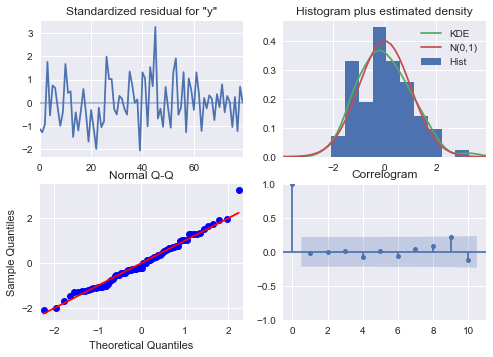

In [173]:
results_auto_SARIMA_rose.plot_diagnostics()
plt.show()

In [174]:
pred_dynamic = results_auto_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [175]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose = results_auto_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [176]:
predicted_auto_SARIMA_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  45.229137  14.459295      16.889440      73.568833
1  63.052964  14.504070      34.625510      91.480418
2  68.118091  14.454103      39.788570      96.447613
3  61.824708  14.450336      33.502570      90.146847
4  68.436645  14.470908      40.074188      96.799103

In [177]:
# Extract the predicted and true values of our time series
rose_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_auto_forecasted'] = predicted_auto_SARIMA_rose.predicted_mean
SARIMA_test.head()

Rose  rose_auto_forecasted
YearMonth                             
1991-01-31  54.0             45.229137
1991-02-28  55.0             63.052964
1991-03-31  66.0             68.118091
1991-04-30  65.0             61.824708
1991-05-31  60.0             68.436645

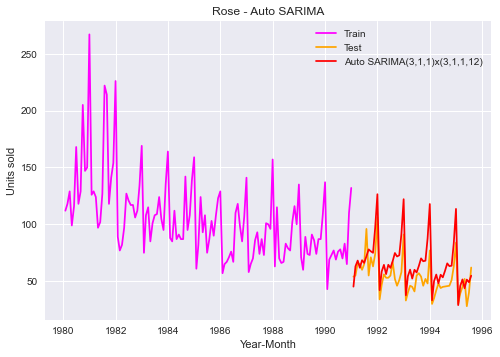

In [178]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_auto_forecasted'], color='red', label='Auto SARIMA(3,1,1)x(3,1,1,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA')
plt.legend(loc='best')

In [179]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_auto_forecasted'])
print("For SARIMA forecast on the SRose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the SRose Testing Data:  RMSE is 16.823 and MAPE is 25.48


In [180]:
resultsDf_8_rose1 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(3,1,1)x(3,1,1,12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose1])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823277      25.48

In [ ]:
#AUTO SARIMA ON LOG(ROSE)

In [181]:
rose_log_train = np.log10(SARIMA_train['Rose'])

In [182]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 1, 0)(0, 1, 0, 12)
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [183]:
SARIMA_AIC_rose_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [184]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose_log = SARIMA_model_rose_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose_log.aic))
        SARIMA_AIC_rose_log = SARIMA_AIC_rose_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose_log.aic}, ignore_index=True)

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWar

SARIMA(0, 0, 0)x(0, 0, 0, 12)7 - AIC:555.7706618310567
SARIMA(0, 0, 0)x(0, 0, 1, 12)7 - AIC:380.7976958405474
SARIMA(0, 0, 0)x(0, 0, 2, 12)7 - AIC:253.02210408794198
SARIMA(0, 0, 0)x(0, 1, 0, 12)7 - AIC:-203.8690585880142


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: Val

SARIMA(0, 0, 0)x(0, 1, 1, 12)7 - AIC:-207.30753067775314


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(0, 1, 2, 12)7 - AIC:-200.3749101416422
SARIMA(0, 0, 0)x(1, 0, 0, 12)7 - AIC:-214.78669155250248


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: Val

SARIMA(0, 0, 0)x(1, 0, 1, 12)7 - AIC:-256.17028103208605


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(1, 0, 2, 12)7 - AIC:-233.1445326662878
SARIMA(0, 0, 0)x(1, 1, 0, 12)7 - AIC:-209.00182479539552


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(1, 1, 1, 12)7 - AIC:-206.62380291142412


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(1, 1, 2, 12)7 - AIC:-198.50588487035787
SARIMA(0, 0, 0)x(2, 0, 0, 12)7 - AIC:-233.48304581147525


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(2, 0, 1, 12)7 - AIC:-233.82264953371393


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(2, 0, 2, 12)7 - AIC:-238.64163634257275


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(2, 1, 0, 12)7 - AIC:-201.4914449430335


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(2, 1, 1, 12)7 - AIC:-203.4992557680455


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(2, 1, 2, 12)7 - AIC:-199.7236977278386
SARIMA(0, 0, 1)x(0, 0, 0, 12)7 - AIC:391.75100412802465
SARIMA(0, 0, 1)x(0, 0, 1, 12)7 - AIC:239.10122104178936

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(0, 0, 2, 12)7 - AIC:150.58320730599468
SARIMA(0, 0, 1)x(0, 1, 0, 12)7 - AIC:-207.17629248376673


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(0, 1, 1, 12)7 - AIC:-220.6315933297886


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(0, 1, 2, 12)7 - AIC:-201.1251450745636


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(1, 0, 0, 12)7 - AIC:-217.93846274505472


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(1, 0, 1, 12)7 - AIC:-254.97884392279303


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(1, 0, 2, 12)7 - AIC:-233.99253812352802


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(1, 1, 0, 12)7 - AIC:-220.16163385278963


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(1, 1, 1, 12)7 - AIC:-218.45251249633273


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(1, 1, 2, 12)7 - AIC:-200.36981575348278


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(2, 0, 0, 12)7 - AIC:-237.0516333721462


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(2, 0, 1, 12)7 - AIC:-237.892793205363


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(2, 0, 2, 12)7 - AIC:-240.49696148010904


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(2, 1, 0, 12)7 - AIC:-203.6909099010311


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(2, 1, 1, 12)7 - AIC:-204.3339791604322


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(2, 1, 2, 12)7 - AIC:-201.6199944883604
SARIMA(0, 0, 2)x(0, 0, 0, 12)7 - AIC:275.88768659422817

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(0, 0, 1, 12)7 - AIC:142.67283204282057


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(0, 0, 2, 12)7 - AIC:85.59865751207367
SARIMA(0, 0, 2)x(0, 1, 0, 12)7 - AIC:-202.51507474011214


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(0, 1, 1, 12)7 - AIC:-221.02655887168


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(0, 1, 2, 12)7 - AIC:-197.95416876684948


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(1, 0, 0, 12)7 - AIC:-216.9215796487374


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(1, 0, 1, 12)7 - AIC:-250.50210835095686


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(1, 0, 2, 12)7 - AIC:-229.17332157325473


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(1, 1, 0, 12)7 - AIC:-221.15999005329664


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(1, 1, 1, 12)7 - AIC:-218.02469022012528


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(1, 1, 2, 12)7 - AIC:-197.02357105649025


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(2, 0, 0, 12)7 - AIC:-235.12614763217334


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(2, 0, 1, 12)7 - AIC:-235.96078929515568


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(2, 0, 2, 12)7 - AIC:-237.55227163682167


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(2, 1, 0, 12)7 - AIC:-203.28082910184065


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(2, 1, 1, 12)7 - AIC:-202.79490038520544


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(2, 1, 2, 12)7 - AIC:-199.7973436240387
SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-132.2811508841321
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-151.24402059017388


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWar

SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-163.20900777080237
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-151.39741606038652


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-195.6981021193251


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-168.63061386977577
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-176.1467936067722


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-193.80943157025158


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-182.39902122098096
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-184.19318056796806


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-184.99828084552436


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-167.69812346060976
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-189.5613341304328

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-189.0500489250811


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-188.6755015543245
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-163.31782076512172


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-163.44104711880428


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:-165.20280399955524


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:-180.16317688315075


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: Val

SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:-193.9888499679484
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:-205.88038320727813
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:-201.16086973215872


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:-245.3156226469705


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:-215.71778319695937


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: Val

SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:-226.46068035197877
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:-247.07640779281485


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:-225.17137665379778


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:-227.96854191543318


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:-224.91037275728976


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:-214.00126259853025


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:-238.8703526247194


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:-236.87300428291346


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:-233.2782410738124


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:-211.7084801861823


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:-213.56045302462385


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:-213.983710592402
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:-180.90674392514822


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:-195.1514447860984


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:-204.8649477546241


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:-201.89225877486604


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:-242.23212630769075


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:-211.40879671143833


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:-229.57397168268145


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:-243.81884518896024


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:-227.0706721767702


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:-229.60606922597592


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:-226.58393710729013


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:-209.75530824458343


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:-239.81418510431178


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:-237.87796439965027


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:-235.5350063341175


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:-210.54340955428702


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:-211.93556266554566


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:-210.32268514442364
SARIMA(1, 0, 0)x(0, 0, 0, 12)7 - AIC:-132.42703580680157
SARIMA(1, 0, 0)x(0, 0, 1, 12)7 - AIC:-151.63152712547242


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWar

SARIMA(1, 0, 0)x(0, 0, 2, 12)7 - AIC:-142.43833275309535
SARIMA(1, 0, 0)x(0, 1, 0, 12)7 - AIC:-208.83718368129388


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(0, 1, 1, 12)7 - AIC:-225.1584387236978


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(0, 1, 2, 12)7 - AIC:-203.72944896023444
SARIMA(1, 0, 0)x(1, 0, 0, 12)7 - AIC:-214.5669277786226

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'



SARIMA(1, 0, 0)x(1, 0, 1, 12)7 - AIC:-257.6207499984017


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(1, 0, 2, 12)7 - AIC:-236.07753534146607
SARIMA(1, 0, 0)x(1, 1, 0, 12)7 - AIC:-222.46228984556856


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(1, 1, 1, 12)7 - AIC:-220.82942178676063


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(1, 1, 2, 12)7 - AIC:-201.89217437882886


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(2, 0, 0, 12)7 - AIC:-234.7615062428567


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(2, 0, 1, 12)7 - AIC:-237.8880905732511


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(2, 0, 2, 12)7 - AIC:-241.7459491124597


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(2, 1, 0, 12)7 - AIC:-204.20993341064758


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(2, 1, 1, 12)7 - AIC:-202.63703749659703


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(2, 1, 2, 12)7 - AIC:-201.1167500527905
SARIMA(1, 0, 1)x(0, 0, 0, 12)7 - AIC:-186.23909950184893


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(0, 0, 1, 12)7 - AIC:-200.42918929763673


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(0, 0, 2, 12)7 - AIC:-195.0396855049676
SARIMA(1, 0, 1)x(0, 1, 0, 12)7 - AIC:-205.230956407838


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(0, 1, 1, 12)7 - AIC:-248.90512213335433


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(0, 1, 2, 12)7 - AIC:-217.17184344394235


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(1, 0, 0, 12)7 - AIC:-213.78242867085692


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(1, 0, 1, 12)7 - AIC:-255.48206052235946


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(1, 0, 2, 12)7 - AIC:-231.13456570748338


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(1, 1, 0, 12)7 - AIC:-231.84724954224802


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(1, 1, 1, 12)7 - AIC:-232.7448236994349


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(1, 1, 2, 12)7 - AIC:-217.13830199087707


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(2, 0, 0, 12)7 - AIC:-234.2847026858695


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(2, 0, 1, 12)7 - AIC:-236.66361499899196


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(2, 0, 2, 12)7 - AIC:-240.51570352963586


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(2, 1, 0, 12)7 - AIC:-203.49043323180604


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(2, 1, 1, 12)7 - AIC:-215.0745092455104


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(2, 1, 2, 12)7 - AIC:-216.17334495212998
SARIMA(1, 0, 2)x(0, 0, 0, 12)7 - AIC:-186.39089962083764


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(0, 0, 1, 12)7 - AIC:-201.09045678910968


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(0, 0, 2, 12)7 - AIC:-194.65417639471434
SARIMA(1, 0, 2)x(0, 1, 0, 12)7 - AIC:-203.80790693631042

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(0, 1, 1, 12)7 - AIC:-247.73418133443522


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(0, 1, 2, 12)7 - AIC:-217.33047686196062


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(1, 0, 0, 12)7 - AIC:-211.20780826655508


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(1, 0, 1, 12)7 - AIC:-248.70821261737228


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(1, 0, 2, 12)7 - AIC:-229.79518339331003


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(1, 1, 0, 12)7 - AIC:-233.73510305854367


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(1, 1, 1, 12)7 - AIC:-231.31561357941374


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(1, 1, 2, 12)7 - AIC:-216.3197991730387


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(2, 0, 0, 12)7 - AIC:-236.52568341967356


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(2, 0, 1, 12)7 - AIC:-238.65120644416936


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(2, 0, 2, 12)7 - AIC:-238.0807492961964


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(2, 1, 0, 12)7 - AIC:-211.6171382038549


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(2, 1, 1, 12)7 - AIC:-212.1394950278625


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(2, 1, 2, 12)7 - AIC:-212.99494517128647
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:-148.66657556379576


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:-165.57392474613232


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:-177.05292850941416
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:-161.8147296949822


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:-210.4065708234242


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:-185.95217055272752
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:-184.88200535862978


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:-207.51664221404994


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:-195.97453418071487
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:-195.19182185890745


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:-197.24859968681827


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:-184.69052505804515
SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.8348363646511

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:-200.27919618416794


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:-202.83686671115214


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:-181.30079557290196


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:-181.45308981005635


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:-183.62489559390687
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:-181.82485136971945


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:-195.9018008608705


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:-206.14977936466857
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:-203.19120461083023


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:-244.19410003251102


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:-214.22123323555917


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: Val

SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:-225.8978007957412
SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:-246.52380238880846


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:-226.36033953596097


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:-227.1089529541533


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:-225.59590636790796


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:-212.50074081834333


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:-236.6315142344687


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:-235.03481307628954


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:-233.1383781136329


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:-211.03141411898363


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:-212.88612510255524


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:-212.25023077264086
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:-180.26441474323457


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:-193.15178446537718


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:-202.3634179956351
SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:-200.35112505522923


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:-243.15203583094763


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:-209.40935723518487


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:-225.49521352046153


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:-245.79245689925472


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:-225.46370952478594


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:-225.4700748333588


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:-224.62296729010095


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:-207.71832098232977


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:-235.6222387091634


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:-233.63929645491


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:-233.3337246041649


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:-209.06037291869765


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:-211.3595638934665


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:-208.29644568312605
SARIMA(2, 0, 0)x(0, 0, 0, 12)7 - AIC:-146.7290645930383


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(0, 0, 1, 12)7 - AIC:-165.34726886512922


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(0, 0, 2, 12)7 - AIC:-157.6696679966708
SARIMA(2, 0, 0)x(0, 1, 0, 12)7 - AIC:-205.42501340808516


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(0, 1, 1, 12)7 - AIC:-225.12396309433936


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(0, 1, 2, 12)7 - AIC:-202.76409631297037


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(1, 0, 0, 12)7 - AIC:-213.1665909386877


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(1, 0, 1, 12)7 - AIC:-253.62064867009497


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(1, 0, 2, 12)7 - AIC:-234.56478202794133
SARIMA(2, 0, 0)x(1, 1, 0, 12)7 - AIC:-221.561888034853


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(1, 1, 1, 12)7 - AIC:-220.4514942789259


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(1, 1, 2, 12)7 - AIC:-200.18887662127844


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(2, 0, 0, 12)7 - AIC:-233.30881492828763


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(2, 0, 1, 12)7 - AIC:-234.5119732259289


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(2, 0, 2, 12)7 - AIC:-239.49233228542343


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(2, 1, 0, 12)7 - AIC:-201.48941922395076


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(2, 1, 1, 12)7 - AIC:-201.40667192125454


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(2, 1, 2, 12)7 - AIC:-199.8976473704199


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(0, 0, 0, 12)7 - AIC:-188.3385884954721


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(0, 0, 1, 12)7 - AIC:-199.95453647662993


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(0, 0, 2, 12)7 - AIC:-187.18959150364836
SARIMA(2, 0, 1)x(0, 1, 0, 12)7 - AIC:-203.42995987956914


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(0, 1, 1, 12)7 - AIC:-248.718240813141


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(0, 1, 2, 12)7 - AIC:-216.7280529523899


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(1, 0, 0, 12)7 - AIC:-211.40385448068184


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(1, 0, 1, 12)7 - AIC:-251.43417484185062


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(1, 0, 2, 12)7 - AIC:-232.39307898193778


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(1, 1, 0, 12)7 - AIC:-231.2932254367639


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(1, 1, 1, 12)7 - AIC:-233.61739479855464


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(1, 1, 2, 12)7 - AIC:-216.36873107722027


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(2, 0, 0, 12)7 - AIC:-232.5874439225033


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(2, 0, 1, 12)7 - AIC:-234.75290200666547


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(2, 0, 2, 12)7 - AIC:-240.518040719008


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(2, 1, 0, 12)7 - AIC:-211.9866638057589


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(2, 1, 1, 12)7 - AIC:-215.27062928964088


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(2, 1, 2, 12)7 - AIC:-214.68493618059736


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(0, 0, 0, 12)7 - AIC:-186.71591585660244


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(0, 0, 1, 12)7 - AIC:-198.3171168374195


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(0, 0, 2, 12)7 - AIC:-190.8955336756185


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(0, 1, 0, 12)7 - AIC:-202.26656747360454


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(0, 1, 1, 12)7 - AIC:-248.53277790207545


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: Val

SARIMA(2, 0, 2)x(0, 1, 2, 12)7 - AIC:-215.37555763452136
SARIMA(2, 0, 2)x(1, 0, 0, 12)7 - AIC:-207.1510035584838


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(1, 0, 1, 12)7 - AIC:-250.37396201064405


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(1, 0, 2, 12)7 - AIC:-227.66631681829335


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(1, 1, 0, 12)7 - AIC:-229.63503374624253


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(1, 1, 1, 12)7 - AIC:-229.41820286237305


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(1, 1, 2, 12)7 - AIC:-214.36824100748024


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(2, 0, 0, 12)7 - AIC:-231.35685153156564


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(2, 0, 1, 12)7 - AIC:-233.39846893227536


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(2, 0, 2, 12)7 - AIC:-235.98680729744845


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(2, 1, 0, 12)7 - AIC:-210.01881165141444


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(2, 1, 1, 12)7 - AIC:-211.33553120996825


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(2, 1, 2, 12)7 - AIC:-210.9984727245946
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:-162.05049979882875


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: Val

SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:-172.67759303720914


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:-183.5151340311503
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:-170.97394380093536


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:-216.01651061389896


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:-190.2265821222359
SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:-192.7064355832733

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:-218.07090952467854


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:-201.8372437842962


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:-198.56160406327922


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:-200.15579719972322


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:-188.84621520240304


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:-206.0755652383533


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:-204.24887909719962


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:-205.9434258473701


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:-184.8484356689755


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:-186.32669989701648


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:-187.516007729188
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:-180.18642237452679


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:-194.72043255210633


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:-205.386113770211
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:-203.99973804866323


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:-243.36373736655048


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:-212.24003063489192


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:-224.0500226556257


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:-246.47194033309353


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:-225.25689940174146


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:-222.96974007797908


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:-224.9167454593108


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:-211.0616557721561


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:-235.52221334187303


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:-233.66212677518612


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:-234.3304810749709


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:-207.10470079374795


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:-209.45566627316566


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:-209.69583802893055
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-178.28757666386826


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-190.77979633301075


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:-200.81603173556582


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:-199.75650586663494


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:-243.70798279585856


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:-208.47748200306754


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:-222.20025799633575


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:-243.8190168042035


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:-224.1178714705312


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:-222.70267483991583


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:-226.1635033326724


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:-205.70340529041087


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:-231.56917985476517


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:-229.9386287154225


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:-231.60737478431062


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:-205.08745023983758


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:-209.22657825439373


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:-205.48986557763007


In [186]:
SARIMA_AIC_rose_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
115  (1, 0, 0)  (1, 0, 1, 12) -257.620750
7    (0, 0, 0)  (1, 0, 1, 12) -256.170281
133  (1, 0, 1)  (1, 0, 1, 12) -255.482061
25   (0, 0, 1)  (1, 0, 1, 12) -254.978844
223  (2, 0, 0)  (1, 0, 1, 12) -253.620649

In [187]:
auto_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose_log = auto_SARIMA_rose_log.fit(maxiter=1000)
print(results_auto_SARIMA_rose_log.summary())

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                 132.810
Date:                              Tue, 18 Jan 2022   AIC                           -257.621
Time:                                      20:39:52   BIC                           -246.504
Sample:                                  01-31-1980   HQIC                          -253.107
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1689      0.078      2.179      0.029       0.017       0.321
ar.S.L12       0.98

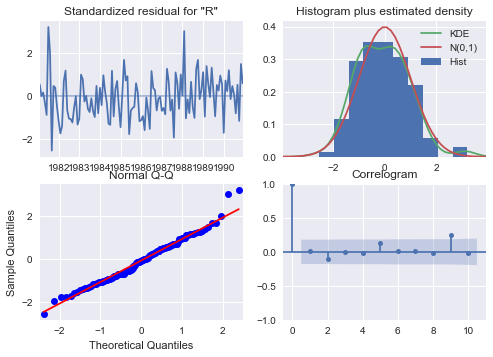

In [188]:
results_auto_SARIMA_rose_log.plot_diagnostics()
plt.show()

In [189]:
pred_dynamic = results_auto_SARIMA_rose_log.get_prediction(dynamic=True, full_results=True)

In [190]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose_log = results_auto_SARIMA_rose_log.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [191]:
predicted_auto_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose            mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1.727939  0.073895       1.583108       1.872769
1991-02-28  1.787594  0.074681       1.641222       1.933966
1991-03-31  1.820439  0.074703       1.674023       1.966855
1991-04-30  1.780352  0.074704       1.633934       1.926769
1991-05-31  1.811708  0.074704       1.665291       1.958125

In [192]:
# Extract the predicted and true values of our time series
rose_log_forecasted = pred_dynamic.predicted_mean
#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
SARIMA_test['rose_log_auto_forecasted'] = np.power(10, predicted_auto_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

Rose  rose_auto_forecasted  rose_log_auto_forecasted
YearMonth                                                       
1991-01-31  54.0             45.229137                 53.448902
1991-02-28  55.0             63.052964                 61.318892
1991-03-31  66.0             68.118091                 66.136162
1991-04-30  65.0             61.824708                 60.304767
1991-05-31  60.0             68.436645                 64.819832

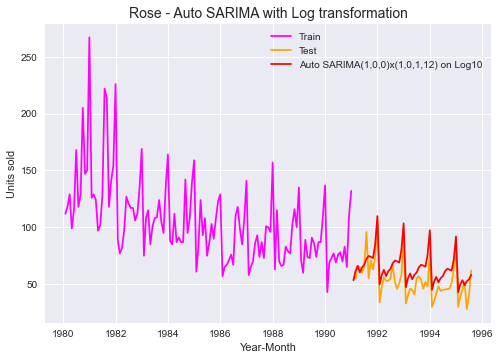

In [193]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_log_auto_forecasted'], color='red', label='Auto SARIMA(1,0,0)x(1,0,1,12) on Log10')

plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA with Log transformation', fontsize=14)

plt.legend(loc='best')

In [194]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_log_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_log_auto_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 13.591 and MAPE is 21.92


In [195]:
resultsDf_8_rose2 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(1,0,0)x(1,0,1,12)-Log10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823277      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590795      21.92

In [ ]:
#Manual SARIMA on Rose
#Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

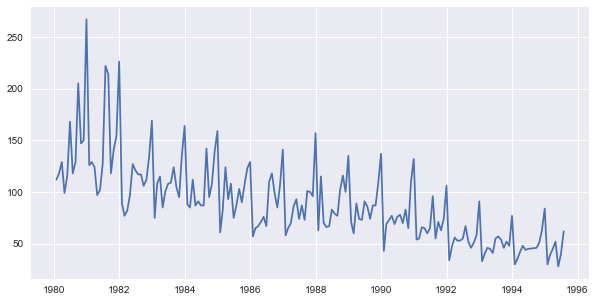

In [196]:
plt.figure(figsize=(10,5))
plt.plot(df['Rose'])

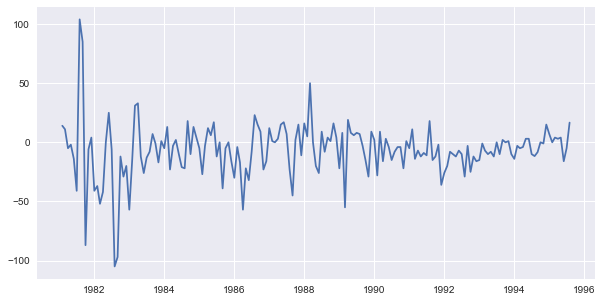

In [197]:
plt.figure(figsize=(10,5))
plt.plot(df['Rose'].diff(12).dropna())

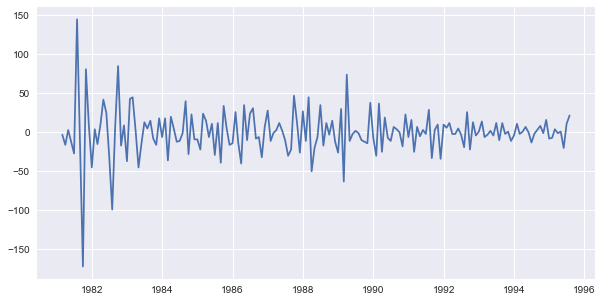

In [198]:
plt.figure(figsize=(10,5))
plt.plot((df['Rose'].diff(12).dropna()).diff().dropna())

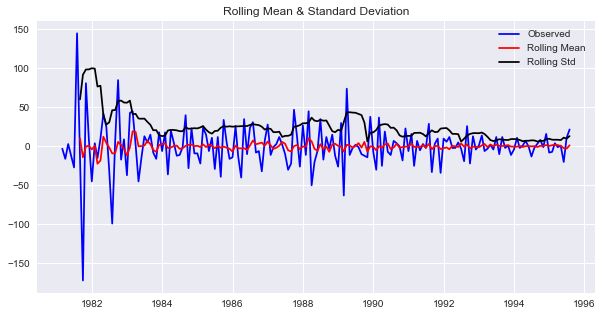

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [199]:
plt.figure(figsize=(10,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna(),'blue')

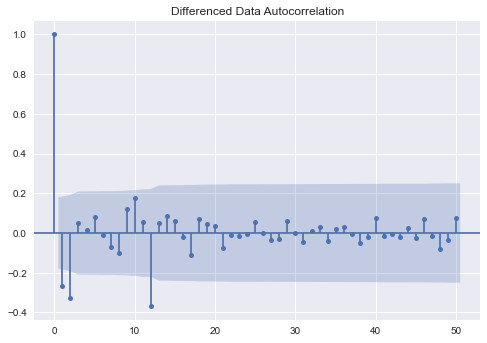

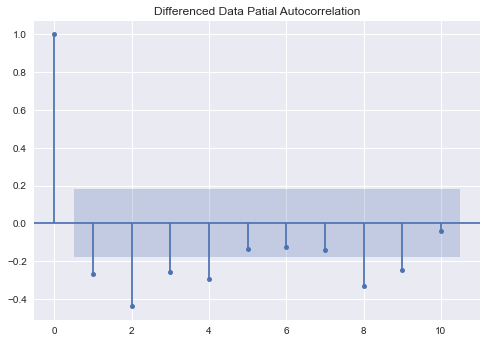

In [200]:
plot_acf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=10,title='Differenced Data Patial Autocorrelation')
plt.show()

In [201]:
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                #seasonal_order=(0, 1, 1, 12),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Tue, 18 Jan 2022   AIC                            786.737
Time:                                    20:45:01   BIC                            809.433
Sample:                                         0   HQIC                           795.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.132     -6.814      0.000      -1.155      -0.639
ar.L2          0.0165      0.171   

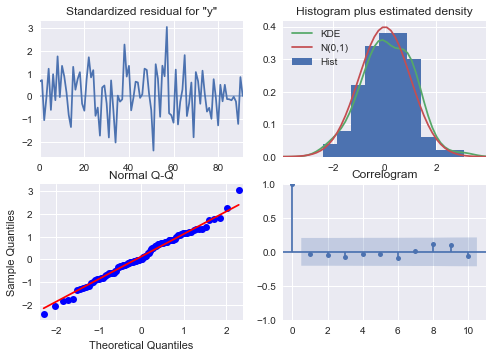

In [202]:
results_manual_SARIMA_rose.plot_diagnostics()
plt.show()

In [203]:
pred_dynamic = results_manual_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [204]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose = results_manual_SARIMA_rose.get_forecast(steps=len(test['Rose']), alpha=0.05)

In [205]:
predicted_manual_SARIMA_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  44.733041  15.552666      14.250375      75.215707
1  64.208694  16.000768      32.847765      95.569622
2  65.110689  16.074606      33.605040      96.616339
3  68.453063  16.150996      36.797692     100.108433
4  61.423433  16.154556      29.761085      93.085782

In [206]:
rose_log_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_manual_forecasted'] = predicted_manual_SARIMA_rose.predicted_mean
SARIMA_test.head()

Rose  rose_auto_forecasted  rose_log_auto_forecasted  \
YearMonth                                                          
1991-01-31  54.0             45.229137                 53.448902   
1991-02-28  55.0             63.052964                 61.318892   
1991-03-31  66.0             68.118091                 66.136162   
1991-04-30  65.0             61.824708                 60.304767   
1991-05-31  60.0             68.436645                 64.819832   

            rose_manual_forecasted  
YearMonth                           
1991-01-31               44.733041  
1991-02-28               64.208694  
1991-03-31               65.110689  
1991-04-30               68.453063  
1991-05-31               61.423433

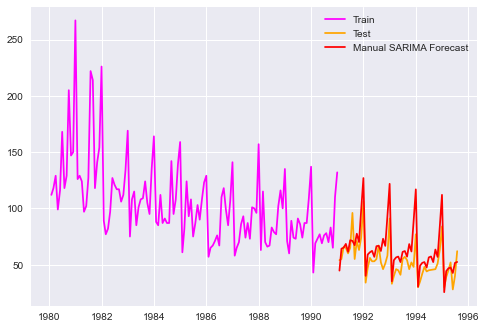

In [207]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_manual_forecasted'], color='red', label='Manual SARIMA Forecast')

plt.legend(loc='best')

In [208]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 15.377 and MAPE is 22.16


In [209]:
resultsDf_8_rose3 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,2)x(0,1,1,12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose3])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823277      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590795      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16

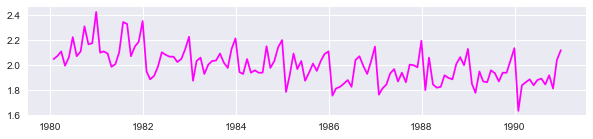

In [210]:
plt.figure(figsize=(10,2))
plt.plot(rose_log_train, color='magenta')

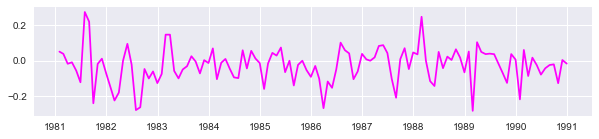

In [211]:
plt.figure(figsize=(10,2))
plt.plot(rose_log_train.diff(12).dropna(), color='magenta')#.diff().dropna())

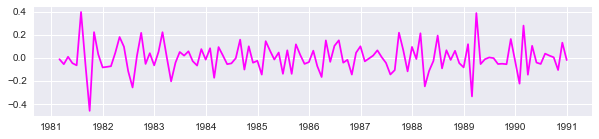

In [212]:
plt.figure(figsize=(10,2))
plt.plot((rose_log_train.diff(12).dropna()).diff().dropna(), color='magenta')#.diff().dropna())

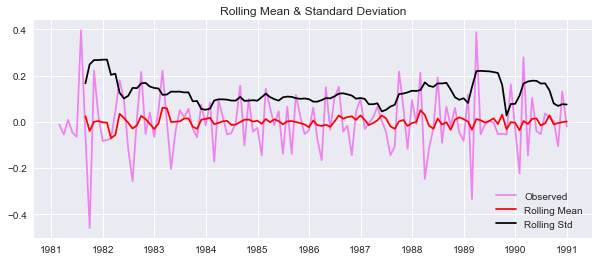

Results of Dickey-Fuller Test:
Test Statistic                  -3.910109
p-value                          0.001962
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [213]:
plt.figure(figsize=(10,4))
test_stationarity((rose_log_train.diff(12).dropna()).diff().dropna(), 'violet')

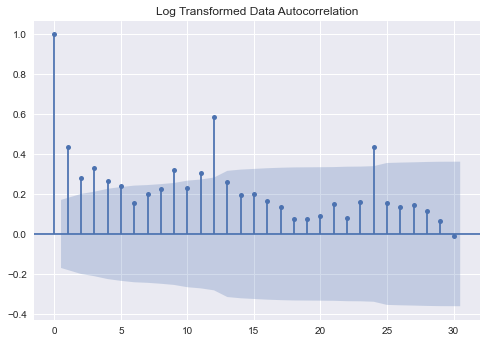

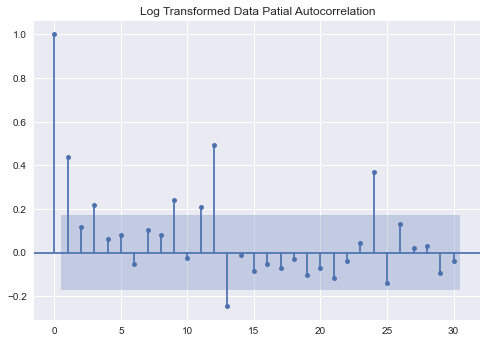

In [214]:
plot_acf(rose_log_train,lags=30,title='Log Transformed Data Autocorrelation')
plot_pacf(rose_log_train,lags=30,title='Log Transformed Data Patial Autocorrelation')
plt.show()

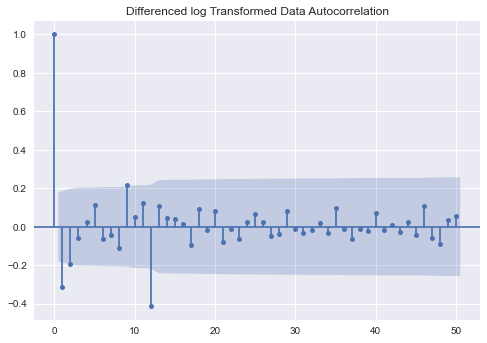

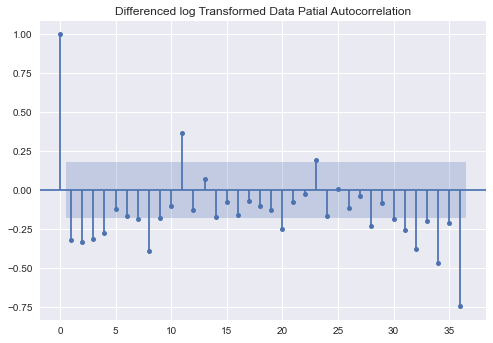

In [215]:
plot_acf((rose_log_train.diff(12).dropna()).diff().dropna(),lags=50,title='Differenced log Transformed Data Autocorrelation')
plot_pacf((rose_log_train.diff(12).dropna()).diff().dropna(),lags=36,title='Differenced log Transformed Data Patial Autocorrelation')
plt.show()

In [216]:
manual_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order= (4, 1, 1),
                                seasonal_order= (0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose_log = manual_SARIMA_rose_log.fit(maxiter=1000)
print(results_manual_SARIMA_rose_log.summary())

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 128.764
Date:                            Tue, 18 Jan 2022   AIC                           -243.528
Time:                                    20:48:00   BIC                           -224.950
Sample:                                01-31-1980   HQIC                          -236.000
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0019      0.118     -0.017      0.987      -0.232       0.229
ar.L2         -0.1547      0.126   

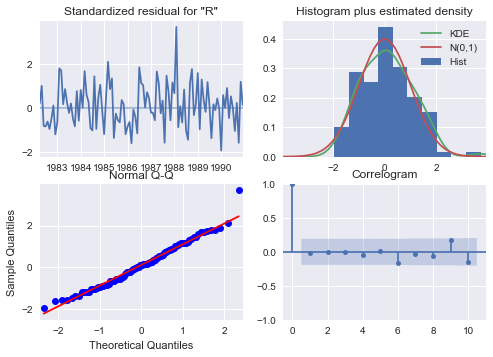

In [217]:
results_manual_SARIMA_rose_log.plot_diagnostics()
plt.show()

In [218]:
pred_dynamic = results_manual_SARIMA_rose_log.get_prediction(dynamic=True, full_results=True)

In [219]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose_log = results_manual_SARIMA_rose_log.get_forecast(steps=len(test['Rose']), alpha=0.1)

In [220]:
predicted_manual_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose            mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1.721121  0.067158       1.589494       1.852748
1991-02-28  1.789069  0.067954       1.655882       1.922256
1991-03-31  1.811243  0.067951       1.678061       1.944425
1991-04-30  1.786829  0.067974       1.653603       1.920055
1991-05-31  1.820831  0.067819       1.687908       1.953753

In [221]:
SARIMA_test['rose_log_manual_forecasted'] = np.power(10,predicted_manual_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

Rose  rose_auto_forecasted  rose_log_auto_forecasted  \
YearMonth                                                          
1991-01-31  54.0             45.229137                 53.448902   
1991-02-28  55.0             63.052964                 61.318892   
1991-03-31  66.0             68.118091                 66.136162   
1991-04-30  65.0             61.824708                 60.304767   
1991-05-31  60.0             68.436645                 64.819832   

            rose_manual_forecasted  rose_log_manual_forecasted  
YearMonth                                                       
1991-01-31               44.733041                   52.616352  
1991-02-28               64.208694                   61.527444  
1991-03-31               65.110689                   64.750476  
1991-04-30               68.453063                   61.210918  
1991-05-31               61.423433                   66.195818

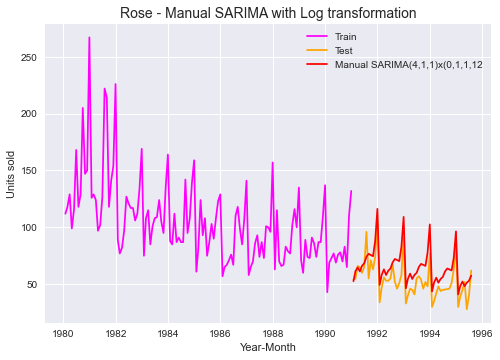

In [222]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_log_manual_forecasted'], color='red', label='Manual SARIMA(4,1,1)x(0,1,1,12')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Manual SARIMA with Log transformation', fontsize=14)

plt.legend(loc='best')

In [223]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_log_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_log_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 14.177 and MAPE is 23.10


In [224]:
resultsDf_8_rose4 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,1)x(0,1,1,12)-Log10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose4])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823277      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590795      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.177101      23.10

In [225]:
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
2 point TMA                            11.529278      13.54
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590795      21.92
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.177101      23.10
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
RegressionOnTime                       15.268885      22.82
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
DES Alpha 0.16, Beta 0.16              15.706968      24.12
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823277      25.48
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16
SES Alpha 0.01                         36.796004      63.88
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.10, Beta 0.10              37.056911      64.02
SimpleAverage                          53.460350      94.93
NaiveModel                             79.718559     145.10

In [226]:
rose_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
2 point TMA                            11.529278      13.54
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590795      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
RegressionOnTime                       15.268885      22.82
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.177101      23.10
DES Alpha 0.16, Beta 0.16              15.706968      24.12
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823277      25.48
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16
SES Alpha 0.01                         36.796004      63.88
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.10, Beta 0.10              37.056911      64.02
SimpleAverage                          53.460350      94.93
NaiveModel                             79.718559     145.10

Text(0.5, 1.0, 'ROSE : Forecast Vs Test Data')

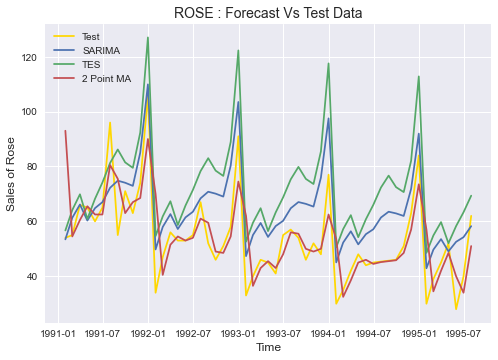

In [227]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'gold')

#SARIMA
plt.plot(SARIMA_test['rose_log_auto_forecasted'],  label='SARIMA')
#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES')
#DES
#plt.plot(DES_test['predict_rose',0.1,0.1],  label='DES')
#SES
#plt.plot(SES_test['predict_rose'],  label='SES')
#MA
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'],  label='2 Point MA')
#SA
#plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SA')
#Naive
#plt.plot(NaiveModel_test['rose_naive'], label='Naive')
#Regression
#plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : Forecast Vs Test Data', fontsize=14)

In [ ]:
#Build TES Model on Rose full data

In [228]:
model_TES_rose = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_rose_fit = model_TES_rose.fit(smoothing_level=0.1,smoothing_slope=0.2,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_rose_forecast = model_TES_rose_fit.forecast(steps=12)

In [229]:
rmse_rose_tes_full = metrics.mean_squared_error(df['Rose'],model_TES_rose_fit.fittedvalues,squared=False)
mape_rose_tes_full = MAPE(df['Rose'],model_TES_rose_fit.fittedvalues)
print("TES forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_tes_full, mape_rose_tes_full))

TES forecast on the Rose Full Data:  RMSE is 17.404 and MAPE is 13.87


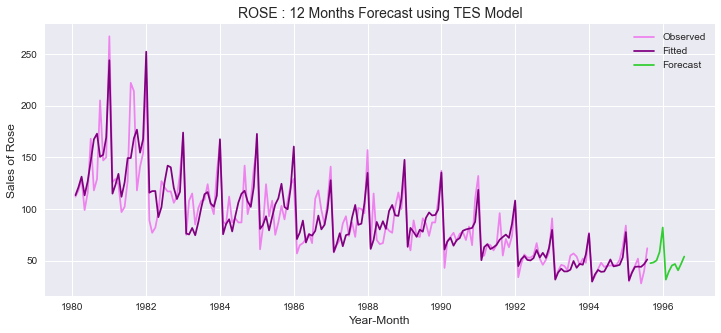

In [230]:
plt.figure(figsize=(12,5))

plt.plot(df['Rose'], label='Observed', color = 'violet')
plt.plot(model_TES_rose_fit.fittedvalues, label='Fitted', color = 'purple')
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using TES Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

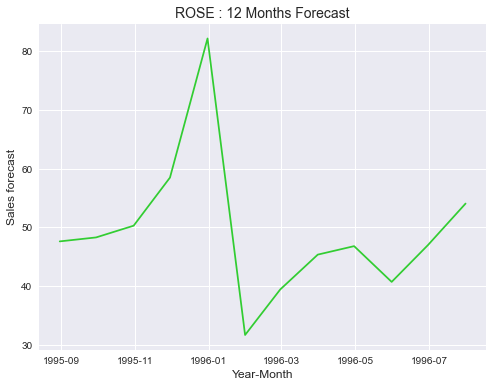

In [231]:
plt.figure(figsize=(8,6))
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('ROSE : 12 Months Forecast', fontsize=14)

In [ ]:
#Try SARIMAX

In [232]:
rose_log_trans = np.log10(df['Rose'])

In [233]:
rose_full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],#rose_log_trans.values,
                                order= (4,1,1), #(1,0,0), #(4,1,1)x(0,1,1,12)
                                seasonal_order= (0,1,1,12), #(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_rose = rose_full_data_model.fit(maxiter=1000)
print(results_full_data_model_rose.summary())

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -664.135
Date:                            Tue, 18 Jan 2022   AIC                           1342.270
Time:                                    21:06:31   BIC                           1363.796
Sample:                                01-31-1980   HQIC                          1351.011
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0914      0.084      1.093      0.274      -0.072       0.255
ar.L2         -0.1077      0.077   

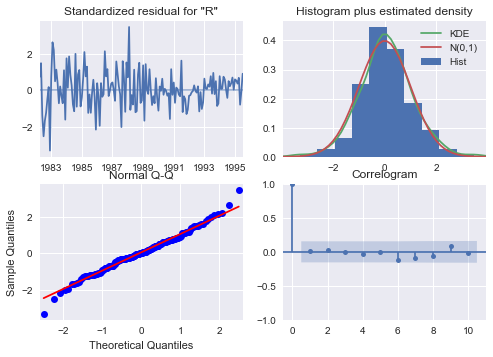

In [234]:
results_full_data_model_rose.plot_diagnostics();

In [235]:
predicted_rose_SARIMA_full_data = results_full_data_model_rose.get_forecast(steps=12)
predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  46.540808  15.245486      16.660205      76.421412
1995-09-30  45.514601  15.769108      14.607718      76.421484
1995-10-31  46.226234  15.827871      15.204176      77.248292
1995-11-30  54.319829  15.831176      23.291295      85.348363
1995-12-31  82.214864  15.835193      51.178455     113.251272

In [236]:
#rmse_rose_sarima_full = metrics.mean_squared_error(df['Rose'],np.power(10,results_full_data_model_rose.fittedvalues),squared=False)
#mape_rose_sarima_full = MAPE(df['Rose'],np.power(10,results_full_data_model_rose.fittedvalues))
rmse_rose_sarima_full = metrics.mean_squared_error(df['Rose'],results_full_data_model_rose.fittedvalues,squared=False)
mape_rose_sarima_full = MAPE(df['Rose'],results_full_data_model_rose.fittedvalues)

print("For SARIMA forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_sarima_full, mape_rose_sarima_full))

For SARIMA forecast on the Rose Full Data:  RMSE is 30.676 and MAPE is 19.40


In [237]:
pred_full_manual_SARIMA_date = predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

In [238]:
results_full_data_model_rose.fittedvalues.head()

YearMonth
1980-01-31      0.000000
1980-02-29    115.410430
1980-03-31    114.398802
1980-04-30    123.947737
1980-05-31     92.219740
dtype: float64

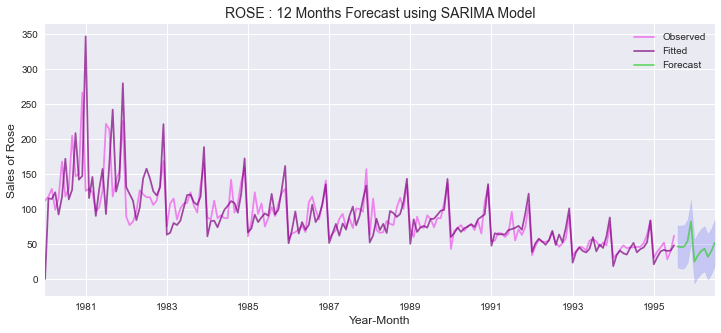

In [239]:
plt.figure(figsize=(12,5))

axis = df['Rose'].plot(label='Observed', color = 'violet')

#np.power(10,results_full_data_model_rose.fittedvalues).plot(label='Fitted', alpha=0.7, color = 'crimson')
#np.power(10,pred_full_manual_SARIMA_date['mean']).plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')

results_full_data_model_rose.fittedvalues.plot(label='Fitted', alpha=0.7, color = 'purple')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'limegreen')

axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

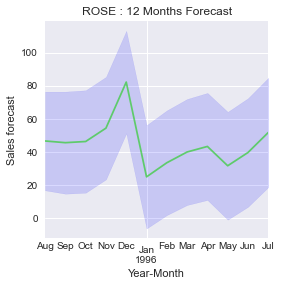

In [240]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'limegreen')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('ROSE : 12 Months Forecast', fontsize=12)

In [241]:
forecast2 = pd.DataFrame({'ROSE':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast2

ROSE
1995-08-31  46.54
1995-09-30  45.51
1995-10-31  46.23
1995-11-30  54.32
1995-12-31  82.21
1996-01-31  24.81
1996-02-29  33.35
1996-03-31  39.87
1996-04-30  43.23
1996-05-31  31.53
1996-06-30  39.56
1996-07-31  51.70

In [242]:
forecast2.describe()

ROSE
count  12.000000
mean   44.905000
std    14.473222
min    24.810000
25%    38.007500
50%    44.370000
75%    47.830000
max    82.210000

In [243]:
forecast2.sum()

ROSE    538.86
dtype: float64